# **SC1015 Mini-project: Identifying Important Health Metrics for Diabetes Prediction**

*By: Guo Yong, Shawn and Zhi Shen*

---

## **Imports**

In [1]:
!pip install imblearn

In [2]:
# for numeric processing
import numpy as np

# for data processing
import pandas as pd

# high level API for data visualization
import seaborn as sb
sb.set()

# low level API for data visualization
import matplotlib.pyplot as plt

# data preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# classification model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# accuracy metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE

# declaring random state
random_state = 42

---

## **Practical Motivation**

Diabetes is a relatively prevalent lifestyle disease worldwide. The World Health Organization predicts that about 422 million people worldwide have diabetes. (World Health Organization, 2022) When looking only at Singapore, it is projected that one in 6 individuals would have diabetes by 2050. (HealthHub, 2021)

<code>Addendum</code>: Diabetes can cause many detrimental symptoms, ranging from constant thirst, to reduced natural healing ability. Diabetes is therefore a chronic illness of high importance to the World Health Organisation (WHO). Looking locally, Singapore has spent a large amount of public funds fighting this hidden pandemic.

We feel that this metric is alarming and we want to better understand the how different health metrics influence our risk of contracting diabetes.

---

## **Sample Collection**

Dataset from Kaggle: "*Personal Key Indicators of Heart Disease*" by Kamil Pytlak

"Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents." (Pytlak, 2022)

Although we are not using the dataset for its intended purpose, the dataset does provide the essential information we want, mainly whether an individual has diabetes and their health metrics.


**Columns:**

>**HeartDisease** - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) <br>
>
>**BMI** - Body Mass Index (BMI) <br>
>
>**Smoking** - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] <br>
>
>**AlcoholDrinking** - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) <br>
>
>**Stroke** - (Ever told) (you had) a stroke? <br>
>
>**PhysicalHealth** - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days) <br>
>
>**MentalHealth** - Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)<br>
>
>**DiffWalking** - Do you have serious difficulty walking or climbing stairs? <br>
>
>**Sex** - Are you male or female? <br>
>
>**AgeCategory** - Fourteen-level age category <br>
>
>**Race** - Imputed race/ethnicity value <br>
>
>**Diabetic** - (Ever told) (you had) diabetes? <br>
>
>**PhysicalActivity** - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job <br>
>
>**GenHealth** - Would you say that in general your health is... <br>
>
>**SleepTime** - On average, how many hours of sleep do you get in a 24-hour period? <br>
>
>**Asthma** - (Ever told) (you had) asthma? <br>
>
>**KidneyDisease** - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? <br>
>
>**SkinCancer** - (Ever told) (you had) skin cancer? <br>
>

The dataset contains 18 variables, 14 of which are categorical and the remaining 4 are numeric.

Source : https://www.kaggle.com/kamilpytlak/personal-key-indicators-of-heart-disease (requires login to download)

In [3]:
# load in the dataset
raw = pd.read_csv("heart_2020_cleaned.csv")
raw

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


---

## **Problem Formulation** 

<em><strong>Problem Statement:</strong> What are some of the important health metrics in determining the risk of diabetes?</em>

Our group wishes to link different health metrics to the risk of contracting diabetes. Specifically, we wish to identify some important health metrics for predicting the risk of contracting diabetes. 

To tackle this problem, we will train a model to classify whether an individual is diabetic and extract the information about the importance of the different predictors used. Based on this information, we will be able to judge whether a health metric is important relative to the other health metrics we chose. 

As the dataset has many categorical variables, we will select the 2 variables with the strongest relationship with diabetes. 

---

## **Data Preparation**

The original dataset has nearly 300 variables, but this has been reduced to 18 by Pytlak. He left the most crucial metrics in determining one's risk of heart disease. However, as we are interested in predicting diabetes, there is a need to clean the data one more time.

Since the data is mixed data (both numeric and categorical) and is an csv file, the data is highly organised and has clearly defined variables. This makes it easy to mine, visualise and analyse.

Moreover, we believe the data selected is highly reliable, as it was collected by a governing body, the Centers for Disease Control & Prevention.

In [4]:
# make a copy of the dataset
cleaned = raw.copy()

# general information on the dataset
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# display all duplicated data points
cleaned[cleaned.duplicated(keep = False)].sort_values(by = "BMI")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
188282,No,15.43,No,No,No,0.0,0.0,Yes,Male,35-39,American Indian/Alaskan Native,No,Yes,Good,8.0,Yes,No,No
186950,No,15.43,No,No,No,0.0,0.0,Yes,Male,35-39,American Indian/Alaskan Native,No,Yes,Good,8.0,Yes,No,No
188328,No,15.43,No,No,No,0.0,0.0,Yes,Male,35-39,American Indian/Alaskan Native,No,Yes,Good,8.0,Yes,No,No
187048,No,15.43,No,No,No,0.0,0.0,Yes,Male,35-39,American Indian/Alaskan Native,No,Yes,Good,8.0,Yes,No,No
75493,No,16.24,Yes,No,No,2.0,10.0,No,Male,18-24,White,No,Yes,Good,5.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146012,No,46.11,No,No,No,0.0,0.0,No,Male,40-44,White,No,Yes,Very good,8.0,No,No,No
149992,No,46.99,No,No,No,0.0,0.0,No,Female,45-49,Black,Yes,Yes,Very good,8.0,No,No,No
77717,No,46.99,No,No,No,0.0,0.0,No,Female,45-49,Black,Yes,Yes,Very good,8.0,No,No,No
37034,No,53.14,No,No,No,0.0,0.0,No,Female,45-49,White,No,No,Good,4.0,No,No,No


In [6]:
# dropping all duplicated data points
cleaned = cleaned.drop_duplicates()

# resetting index
cleaned.reset_index(inplace = True, drop = True)

We decided to drop the duplicates in the dataset to make it more balanced.

We believe that it is highly unlikely that two or more individuals share the exact same metrics, down to the subjective questions like <code>GenHealth</code> and for numeric values like <code>BMI</code>. As such, we believe that they are duplicate entries.

However, we acknowledge that there is a small chance that two individuals really do have the exact same metrics and that we are possibly removing unique entries which would distort the true distribution of data.

<br>

For <code>PhysicalHealth</code> & <code>MentalHealth</code>, we believe that the questionnaire was framed relatively poorly.

To reiterate, <code>PhysicalHealth</code> & <code>MentalHealth</code> are supposed to denote the number of days when the individual is feeling physically or mentally unwell (for the past month) respectively. 

Observing the data spread, we can see, that the data is extremely skewed towards the left (which is zero days of feeling physically or mentally unwell), with an appreciative increase of individuals in "30 Days". 

We stand to reason that individuals might not be fully aware or observant of their physical and mental health, unless they have a physical or mental health problem. Even so, if they do, they would likely answer 30 days, instead of giving an actual number of days.

Besides that, we also feel that the `PhysicalHealth` and `MentalHealth` are amalgamations of various health issues, and we cannot narrow down such health issues to their respective symptoms or diseases. In other words, we cannot narrow down the individual's "poor health days" to being just because of diabetes, making this category relatively subjective and difficult to utilise.

Following Google's adage of "Garbage In, Garbage Out", we have decided to remove these categories from our model, as the model can only be as good as our data. Removing them will allow us to analyse and come up with a more objective evaluation of the individual's risk of diabetes.

<AxesSubplot:xlabel='MentalHealth'>

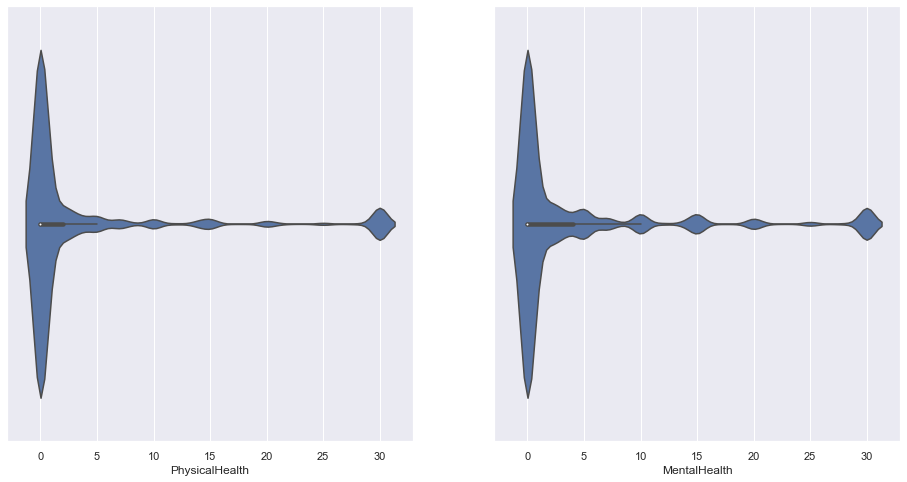

In [7]:
# distribution for physical health and mental health
figure, axes = plt.subplots(1, 2, figsize = (16, 8))
sb.violinplot(data = cleaned, x = "PhysicalHealth", ax = axes[0])
sb.violinplot(data = cleaned, x = "MentalHealth", ax = axes[1])

In [8]:
# columns that we will be using
numeric_columns = ['BMI', 'SleepTime']
categorical_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# dropping mental health and physical health
cleaned = cleaned.drop(columns = ["PhysicalHealth" , "MentalHealth"])

In [9]:
# check for null values
print("Variable\t    Count")
cleaned.isna().sum()

Variable	    Count


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

A quick check reveals that there are no null values in the dataset that needs to be filled in.

In [10]:
# diplaying the unique values for each categorical value
print("Unique values for each categorical variable")
for variable in categorical_columns:
  print(f"{variable.ljust(20)} : {', '.join(sorted([str(x) for x in cleaned[variable].unique()]))}")

Unique values for each categorical variable
HeartDisease         : No, Yes
Smoking              : No, Yes
AlcoholDrinking      : No, Yes
Stroke               : No, Yes
DiffWalking          : No, Yes
Sex                  : Female, Male
AgeCategory          : 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75-79, 80 or older
Race                 : American Indian/Alaskan Native, Asian, Black, Hispanic, Other, White
Diabetic             : No, No, borderline diabetes, Yes, Yes (during pregnancy)
PhysicalActivity     : No, Yes
GenHealth            : Excellent, Fair, Good, Poor, Very good
Asthma               : No, Yes
KidneyDisease        : No, Yes
SkinCancer           : No, Yes


We noticed that <code>Diabetic</code> is not a "Yes-No" category, and instead has 4 different levels. As such, we decided to drop all <code>No, borderline diabetes</code> and <code>Yes (during pregnancy)</code> entries because of the following reasons. 

* The dataset does not inform us whether the individual has diabetes prior to being pregnant, and therefore we cannot assume it is a preexisting condition, and neither can we assume it is a developed condition as a result of pregnancy. Because of this, we decided to remove these entries.

* Borderline diabetes refers to an intermediate state between a healthy individual and a diabetic individual. We decided to remove the borderline diabetic entries as it would make the distinction between diabetic individuals and non-diabetic individuals as clear as possible and reduce noise.

In [11]:
# dropping rows with No, borderline diabetes and Yes (during pregnancy)
cleaned = cleaned.drop(index = cleaned[cleaned["Diabetic"] == "No, borderline diabetes"].index)
cleaned = cleaned.drop(index = cleaned[cleaned["Diabetic"] == "Yes (during pregnancy)"].index)

# resetting index
cleaned.reset_index(inplace = True, drop = True)

# diplaying the unique values for each categorical value
print("Unique values for each categorical variable")
for variable in categorical_columns:
  print(f"{variable.ljust(20)} : {', '.join(sorted([str(x) for x in cleaned[variable].unique()]))}")

Unique values for each categorical variable
HeartDisease         : No, Yes
Smoking              : No, Yes
AlcoholDrinking      : No, Yes
Stroke               : No, Yes
DiffWalking          : No, Yes
Sex                  : Female, Male
AgeCategory          : 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75-79, 80 or older
Race                 : American Indian/Alaskan Native, Asian, Black, Hispanic, Other, White
Diabetic             : No, Yes
PhysicalActivity     : No, Yes
GenHealth            : Excellent, Fair, Good, Poor, Very good
Asthma               : No, Yes
KidneyDisease        : No, Yes
SkinCancer           : No, Yes


---

## **Exploratory Data Analytics**

### **Numeric Data**

In [12]:
# slicing out the numeric columns and the response variable
numeric_data = cleaned[numeric_columns + ["Diabetic"]]

# summary statistics
numeric_data[numeric_columns].describe()

,BMI,SleepTime
count,292385.000000,292385.000000
mean,28.391301,7.087378
std,6.443653,1.466381
min,12.020000,1.000000
25%,23.960000,6.000000
50%,27.370000,7.000000
75%,31.620000,8.000000
max,94.850000,24.000000


An interesting point to note is that the <code>BMI</code> variable is very skewed as indicated by the mean being far from the median. This could suggest a need for a power transform to transform the distribution to be more normal.

In [13]:
# Evaluating skew
print("Variable\t Skew")
numeric_data.skew(numeric_only = True)

Variable	 Skew


BMI          1.306856
SleepTime    0.699103
dtype: float64

**SleepTime**

<AxesSubplot:title={'center':'Strip plot'}, xlabel='SleepTime', ylabel='Diabetic'>

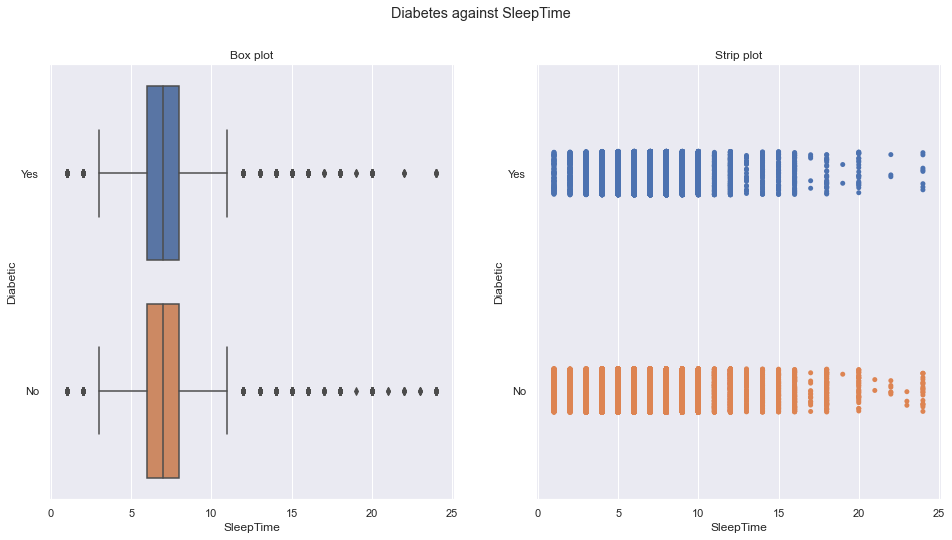

In [14]:
# set up figure
figure, axes = plt.subplots(1, 2, figsize = (16, 8))
figure.suptitle("Diabetes against SleepTime")
axes[0].set_title("Box plot")
axes[1].set_title("Strip plot")

# box plot data visualization
sb.boxplot(data = numeric_data, x = "SleepTime", y = "Diabetic", ax = axes[0])

# strip plot data visualization
sb.stripplot(data = numeric_data, x = "SleepTime", y = "Diabetic", ax = axes[1])

Upon first inspection, what is clear is that <code>SleepTime</code> as a variable is broken up into 24 levels. However, this visualization doesn't present to us the proportion of people within each level that have diabetes, which in this situation will be more insightful.

Based on the strip plot, for <code>SleepTime == 19</code>, <code>SleepTime == 21</code>, and <code>SleepTime == 23</code>, the sample is very small and could possibly severely distort the trend in the proportion of people with diabetes. As such, in the following graph showing the proportion of individuals that have diabetes, the datapoints for <code>SleepTime == 19</code>, <code>SleepTime == 21</code>, and <code>SleepTime == 23</code> may behave oddly.

Unique values of sleep time: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24


<AxesSubplot:title={'center':'Proportion of individuals with diabetes against SleepTime'}, xlabel='SleepTime', ylabel='Proportion of individuals with diabetes'>

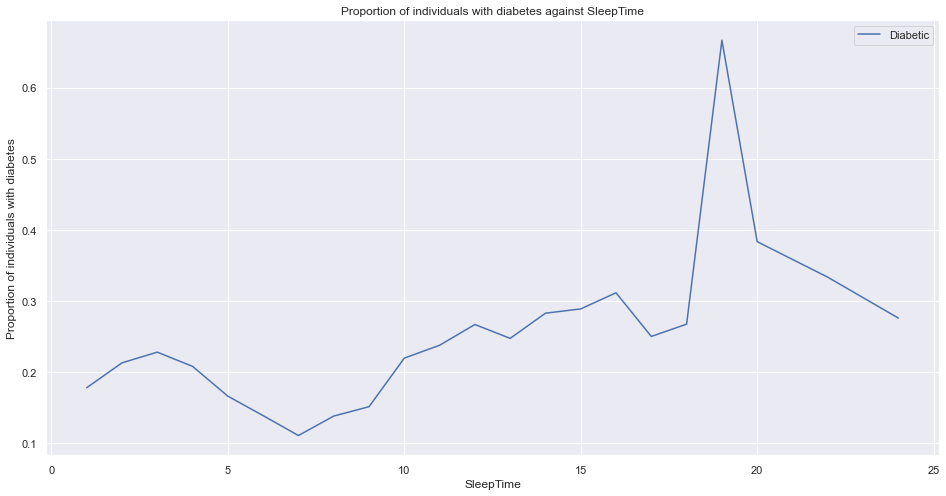

In [15]:
# figure set up
figure, axes = plt.subplots(figsize = (16, 8))
axes.set_title("Proportion of individuals with diabetes against SleepTime")
axes.set_ylabel("Proportion of individuals with diabetes")

# levels of SleepTime
levels = sorted(list(numeric_data["SleepTime"].unique().astype(int)))
print(f"Unique values of sleep time: {', '.join([str(x) for x in levels])}")

# proportion of people within each sleep
hasDiabetes = numeric_data.loc[numeric_data["Diabetic"] == "Yes", ["SleepTime", "Diabetic"]].groupby("SleepTime").count()
dontHaveDiabetes = numeric_data.loc[numeric_data["Diabetic"] == "No", ["SleepTime", "Diabetic"]].groupby("SleepTime").count()
proportion = hasDiabetes / (hasDiabetes + dontHaveDiabetes)

# ploting graph
sb.lineplot(data = proportion)

This graph seems to bring up an interesting point: there are 2 distinct trends in the data.

1. The proportion of individuals with diabetes decreases from <code>SleepTime == 1</code> to <code>SleepTime == 7</code>, and 
2. The proportion of individuals with diabetes increases from <code>SleepTime == 7</code> to <code>SleepTime == 24</code>.

This highlights the possibility that the overall trend is non-linear. This implies that <code>SleepTime</code> and the <code>Diabetic</code> have a relationship but it may not be a linear relationship.

To test this idea, a <code>LogisticRegression</code> model will be trained using <code>SleepTime</code> normally and after a <code>PolynomialFeature</code> to see if there is an improvement.

Linear feature model
              precision    recall  f1-score   support

          No       0.86      1.00      0.93     50369
         Yes       0.00      0.00      0.00      8108

    accuracy                           0.86     58477
   macro avg       0.43      0.50      0.46     58477
weighted avg       0.74      0.86      0.80     58477

Quadratic feature model
              precision    recall  f1-score   support

          No       0.86      1.00      0.93     50369
         Yes       0.38      0.00      0.00      8108

    accuracy                           0.86     58477
   macro avg       0.62      0.50      0.46     58477
weighted avg       0.79      0.86      0.80     58477



<AxesSubplot:title={'center':'Quadratic feature model'}>

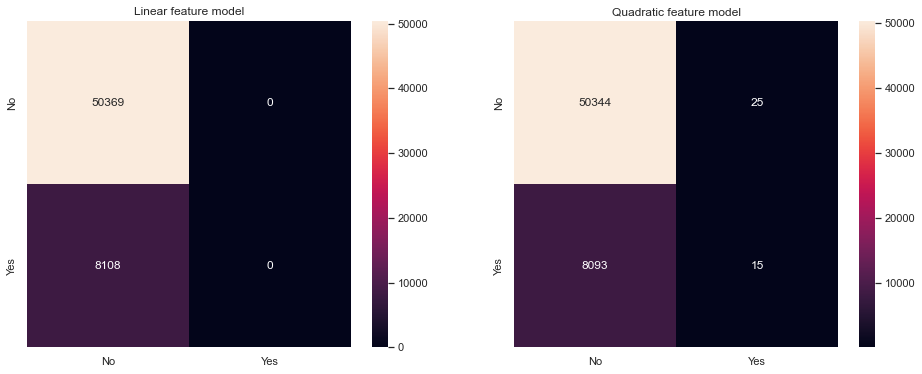

In [16]:
# figure set up
figure, axes = plt.subplots(1, 2, figsize = (16, 6))
axes[0].set_title("Linear feature model")
axes[1].set_title("Quadratic feature model")

# declaring predictors and response
predictors = ["SleepTime"]
response = "Diabetic"
x = numeric_data[predictors]
y = numeric_data[response]

# train test split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = random_state)

# linear feature model
model = LogisticRegression()
model.fit(train_x, train_y)

# results on test data
print("Linear feature model")
print(classification_report(test_y, model.predict(test_x), zero_division = 0))
sb.heatmap(
    data = pd.DataFrame(
        data = confusion_matrix(test_y, model.predict(test_x)), 
        columns = ["No", "Yes"], index = ["No", "Yes"]
        )
    , annot = True, ax = axes[0], fmt = "d")

# transform to quadratic features
transform = PolynomialFeatures(degree = 2)
train_x = transform.fit_transform(train_x)
test_x = transform.transform(test_x)

# quadratic feature model
model = LogisticRegression()
model.fit(train_x, train_y)

# results on test data
print("Quadratic feature model")
print(classification_report(test_y, model.predict(test_x), zero_division = 0))
sb.heatmap(
    data = pd.DataFrame(
        data = confusion_matrix(test_y, model.predict(test_x)), 
        columns = ["No", "Yes"], index = ["No", "Yes"]
        ), 
    annot = True, ax = axes[1], fmt = "d"
    )

Applying the <code>PolynomialFeatures</code> transform improves the model slightly as the model no longer always predicts "No". However, the improvement is very small as the false negative rate is still very high.

**BMI**

<AxesSubplot:title={'center':'Box plot'}, xlabel='BMI', ylabel='Diabetic'>

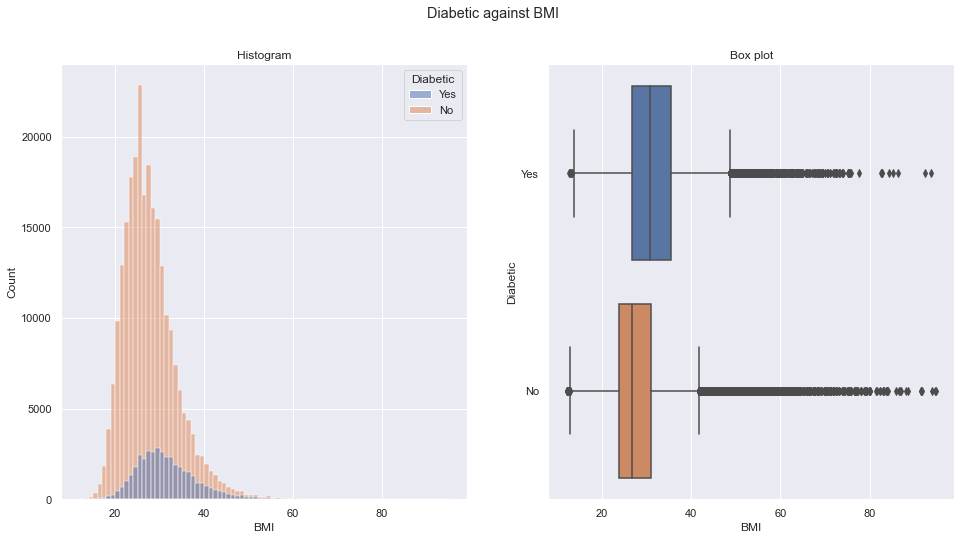

In [17]:
# figure set up
figure, axes = plt.subplots(1, 2, figsize = (16, 8))
figure.suptitle("Diabetic against BMI")
axes[0].set_title("Histogram")
axes[1].set_title("Box plot")

# set up histogram plot
sb.histplot(data = numeric_data, x = 'BMI', hue = "Diabetic", binwidth = 1, ax = axes[0])

# set up boxplot
sb.boxplot(data = numeric_data, x = "BMI", y = "Diabetic", ax = axes[1])

This visualization highlights that the individuals without diabetes tend to have lower BMIs as the Q1, Q2 and Q3 is lower for individuals without diabetes. 

As with <code>SleepTime</code>, this visualization lacks the important information that showcases the relationship between <code>BMI</code> and <code>Diabetic</code>.

<AxesSubplot:title={'center':'Proportion of individuals with diabetes against BMI'}, xlabel='BMI', ylabel='Proportion of individuals with diabetes'>

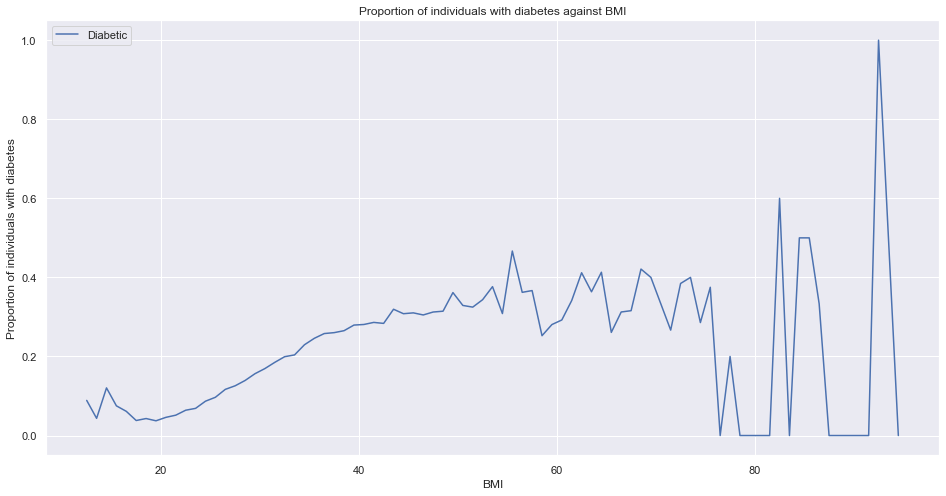

In [18]:
# figure set up
figure, axes = plt.subplots(figsize = (16, 8))
axes.set_title("Proportion of individuals with diabetes against BMI")
axes.set_ylabel("Proportion of individuals with diabetes")

# binning data
binned_data = numeric_data[["BMI", "Diabetic"]].copy()
for i in range(np.floor(binned_data["BMI"].min()).astype(int), np.ceil(binned_data["BMI"].max()).astype(int)):
  binned_data.loc[(binned_data["BMI"] >= i) & (binned_data["BMI"] < i + 1), "BMI"] = i + 0.5

# proportions for each bin
hasDiabetes = binned_data.loc[binned_data["Diabetic"] == "Yes"].groupby("BMI").count()
dontHaveDiabetes = binned_data.loc[binned_data["Diabetic"] == "No"].groupby("BMI").count()
proportion = hasDiabetes / (hasDiabetes + dontHaveDiabetes)

# resolving data points where all individuals either have diabetes or do not have diabetes
hasDiabetesIndex = set(hasDiabetes.index)
dontHaveDiabetesIndex = set(dontHaveDiabetes.index)
hasDiabetesMissing = hasDiabetesIndex.union(dontHaveDiabetesIndex).difference(hasDiabetesIndex)
dontHaveDiabetesMissing = hasDiabetesIndex.union(dontHaveDiabetesIndex).difference(dontHaveDiabetesIndex)
proportion.loc[[True if x in hasDiabetesMissing else False for x in proportion.index], "Diabetic"] = 0
proportion.loc[[True if x in dontHaveDiabetesMissing else False for x in proportion.index], "Diabetic"] = 1

# plot the line
sb.lineplot(data = proportion, ax = axes)

The proportion of individuals with diabetes beyond <code>BMI == 75</code> is erratic as the sample size is very small. Due to this, we will only consider the data points up to <code>BMI == 75</code>.

There are two different trends in the data: 

1. from <code>BMI == 12</code> to <code>BMI == 50</code>, there seems to be a increase in the proportion of individuals with diabetes, and
2. from <code>BMI == 50</code> to <code>BMI == 75</code>, the proportion seems to be relatively constant with some level of fluctuation. 

Again, these trends seem to indicate that <code>BMI</code> has a relation with <code>Diabetic</code>.

Moreover, considering the shape of the curve - it resembles a logistic regression curve - there might be a possible linear relationship between <code>BMI</code> and the logit of odds of having diabetes, suggesting that <code>BMI</code> is a good variable to use to predict <code>Diabetic</code> and is a possible important health metric.

### **Categorical Variables**

We will be studying the percentage of individuals within each level that are diabetic for each categorical variable.

In [19]:
# All predictor categorical variables
predictor_categorical = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 
                         'DiffWalking', 'Sex', 'AgeCategory', 'Race',  'PhysicalActivity', 
                         'GenHealth', 'Asthma', 'KidneyDisease',  'SkinCancer']

Let us consider the predictor variable, <code>HeartDisease</code>, which has two unique values: Yes or No and the response variable, <code>Diabetic</code>, which also has two unique values. Hence, they will be 2 x 2 = 4 percentage values for <code>HeartDisease</code> variable.  

Specifically, the 4 percentage values are calculated as follows:  
>Percentage 1 = (Total samples with <code>HeartDisease</code> (Yes) and with `Diabetic` (Yes) / Total samples with <code>HeartDisease</code> (Yes)) X 100 <br>
>Percentage 2 = (Total samples with <code>HeartDisease</code> (Yes) and with `Diabetic` (No) / Total samples with <code>HeartDisease</code> (Yes)) X 100  
>Percentage 3 = (Total samples with <code>HeartDisease</code> (No) and with `Diabetic` (Yes) / Total samples with <code>HeartDisease</code> (No)) X 100  
>Percentage 4 = (Total samples with <code>HeartDisease</code> (No) and with `Diabetic` (No) / Total samples with <code>HeartDisease</code> (No)) X 100</em>

In [20]:
# Storing percentage for each unique value for a variable according to Diabetic variable
pct = {'Predictor':[], 'UniqueCategory':[], 'Diabetic':[], 'UniqueValue':[], 'Percentage':[]}
for var in predictor_categorical:

    # Extract rows according to Diabetic variable
    DiabeticYes = cleaned[cleaned['Diabetic'] == 'Yes']
    DiabeticNo = cleaned[cleaned['Diabetic'] == 'No']
    
    # Loop through each unique value and calculate the percentage
    for uniq in cleaned[var].unique():
        
        # Total number of rows for each unique value
        total = len(cleaned[cleaned[var] == uniq])

        pct['Predictor'].append(var)
        pct['Predictor'].append(var)
        pct['UniqueCategory'].append(uniq)
        pct['UniqueCategory'].append(uniq)
        
        # Percentage of persons being diabetic and not diabetic
        DiabeticYesPct = round(len(DiabeticYes[DiabeticYes[var] == uniq])/total*100, 2)
        DiabeticNoPct = round(len(DiabeticNo[DiabeticNo[var] == uniq])/total*100, 2)
        
        pct['Diabetic'].append('Yes')
        pct['UniqueValue'].append('(Diabetic) ' + uniq)
        pct['Percentage'].append(DiabeticYesPct)
        pct['Diabetic'].append('No')
        pct['UniqueValue'].append('(Not diabetic) ' + uniq)
        pct['Percentage'].append(DiabeticNoPct)

In [21]:
# Transform the stored values into a dataframe
pctDF = pd.DataFrame(pct)
pctDF.sort_values(by = ['Predictor', 'UniqueValue'], inplace = True)
pctDF.reset_index(inplace = True, drop = True)

In [22]:
# Store the number of unique values for each predictor variable
numUniqueDict = {}
predictor_categorical = sorted(predictor_categorical)

for var in predictor_categorical:
    numUniqueDict[var] = len(cleaned[var].unique())

In [23]:
pctDF

,Predictor,UniqueCategory,Diabetic,UniqueValue,Percentage
0,AgeCategory,18-24,Yes,(Diabetic) 18-24,1.18
1,AgeCategory,25-29,Yes,(Diabetic) 25-29,1.57
2,AgeCategory,30-34,Yes,(Diabetic) 30-34,2.72
3,AgeCategory,35-39,Yes,(Diabetic) 35-39,4.40
4,AgeCategory,40-44,Yes,(Diabetic) 40-44,6.79
...,...,...,...,...,...
83,Smoking,Yes,No,(Not diabetic) Yes,83.96
84,Stroke,No,Yes,(Diabetic) No,13.12
85,Stroke,Yes,Yes,(Diabetic) Yes,32.16
86,Stroke,No,No,(Not diabetic) No,86.88


Let us swap the positions of certain rows for <code>GenHealth</code> category so that they can be displayed in the right order.

In [24]:
pctDF.iloc[39], pctDF.iloc[42] = pctDF.iloc[42], pctDF.iloc[39]
pctDF.iloc[41], pctDF.iloc[42] = pctDF.iloc[42], pctDF.iloc[41]
pctDF.iloc[44], pctDF.iloc[47] = pctDF.iloc[47], pctDF.iloc[44]
pctDF.iloc[46], pctDF.iloc[47] = pctDF.iloc[47], pctDF.iloc[46]

In [25]:
pctDF[35:55]

,Predictor,UniqueCategory,Diabetic,UniqueValue,Percentage
35,DiffWalking,Yes,Yes,(Diabetic) Yes,32.04
36,DiffWalking,No,No,(Not diabetic) No,89.22
37,DiffWalking,Yes,No,(Not diabetic) Yes,67.96
38,GenHealth,Excellent,Yes,(Diabetic) Excellent,3.24
39,GenHealth,Very good,Yes,(Diabetic) Very good,8.19
40,GenHealth,Good,Yes,(Diabetic) Good,17.92
41,GenHealth,Fair,Yes,(Diabetic) Fair,31.26
42,GenHealth,Poor,Yes,(Diabetic) Poor,38.61
43,GenHealth,Excellent,No,(Not diabetic) Excellent,96.76
44,GenHealth,Very good,No,(Not diabetic) Very good,91.81


We will try to explore the relationship by plotting bar charts.

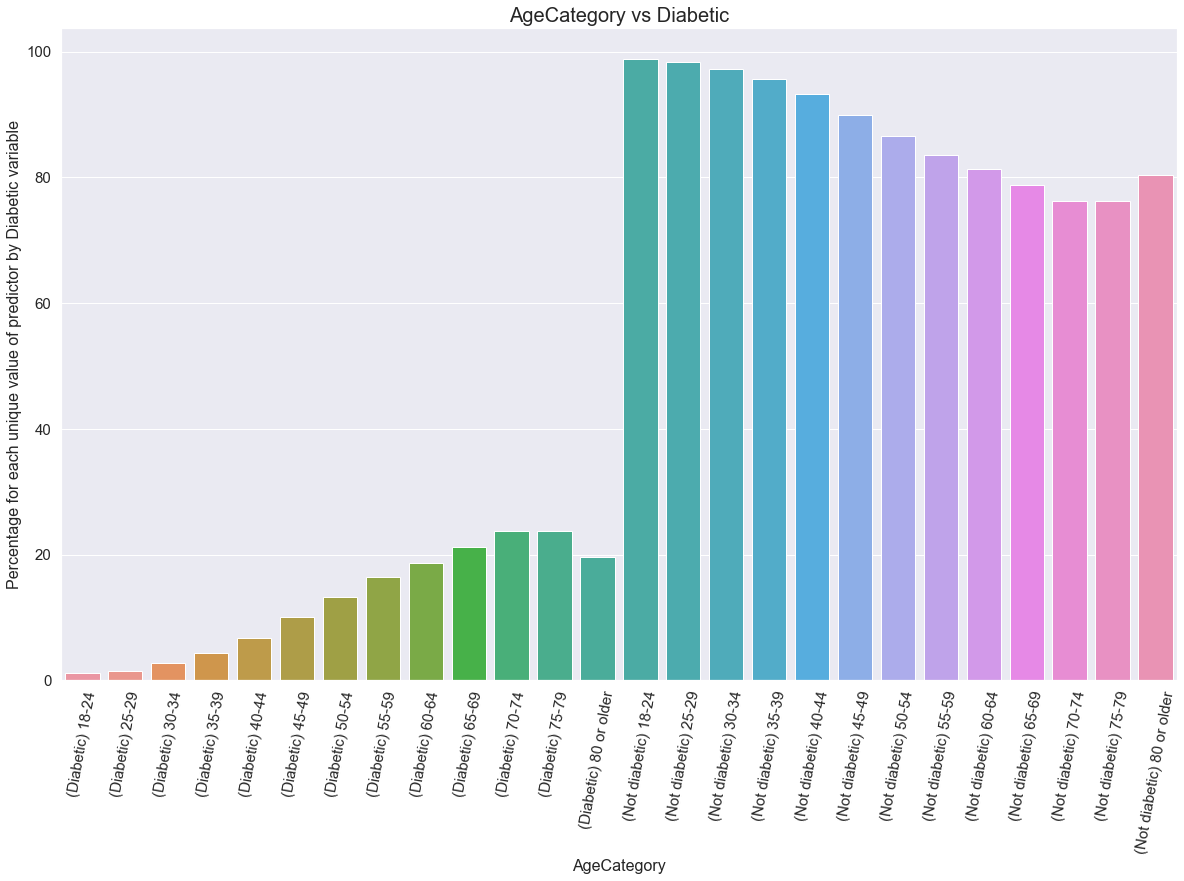

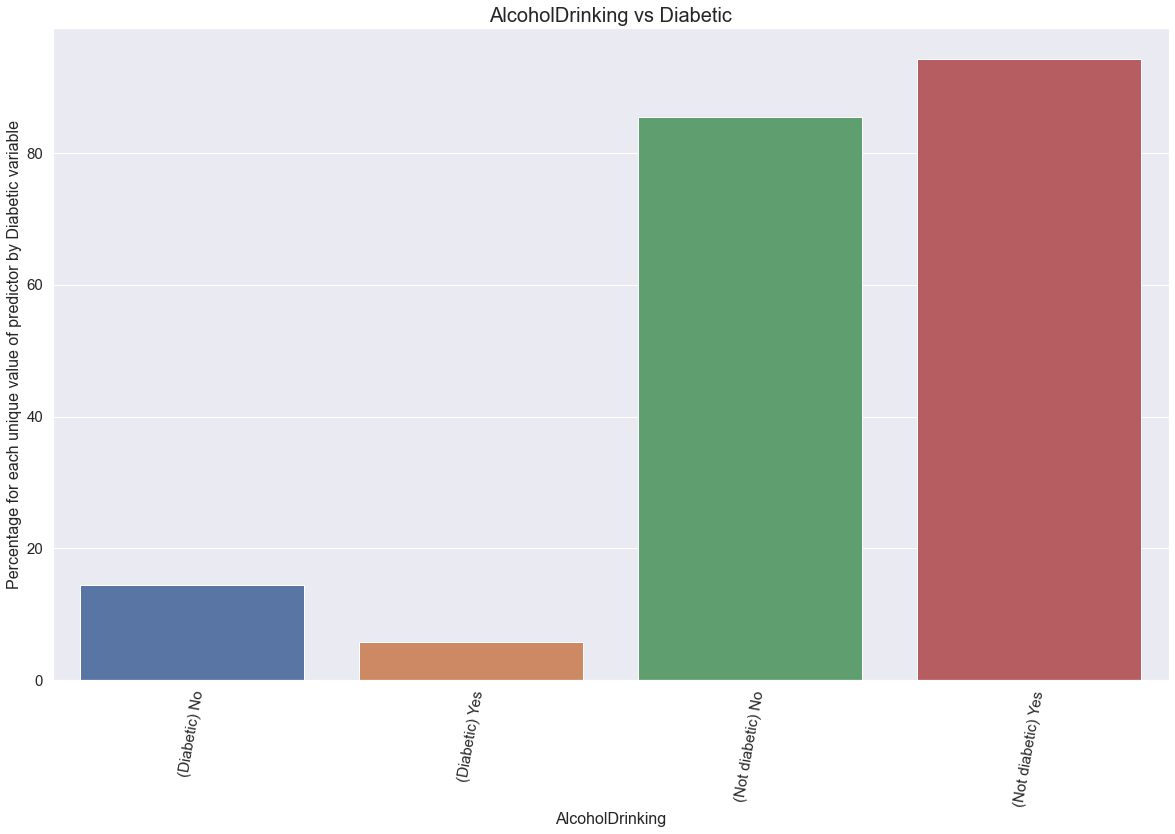

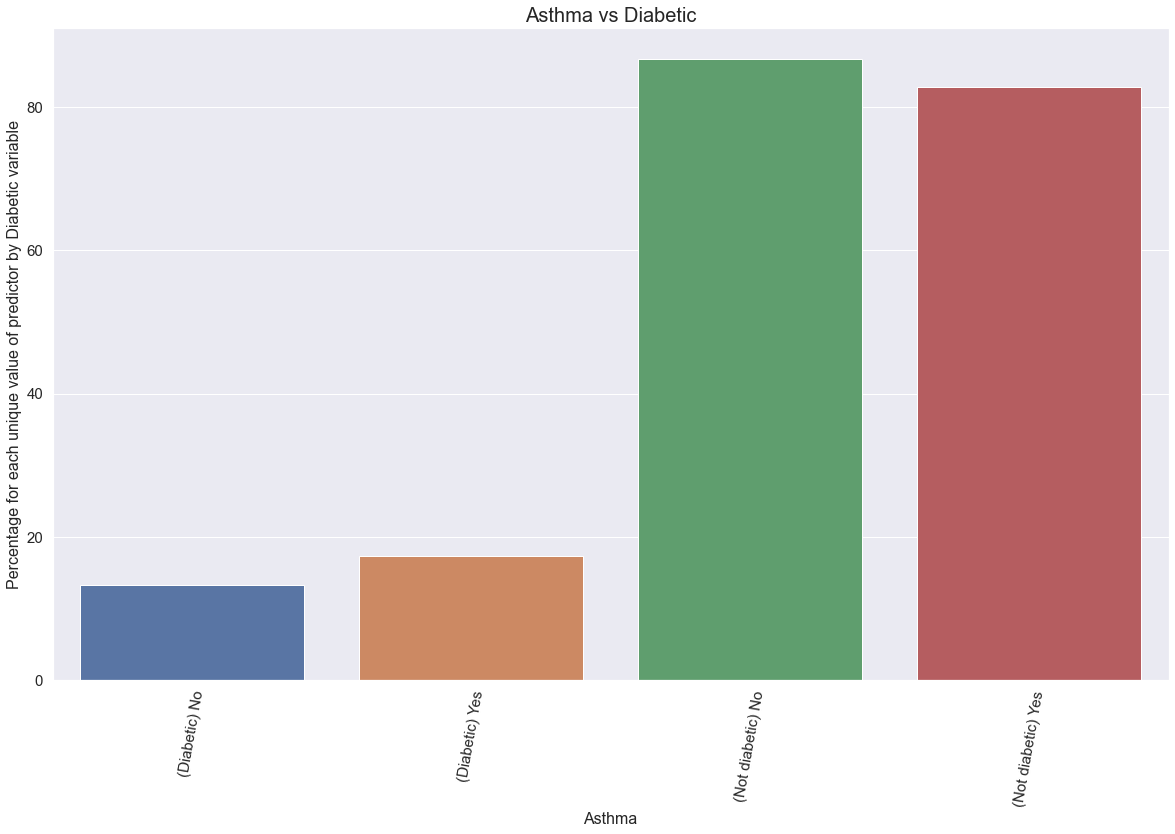

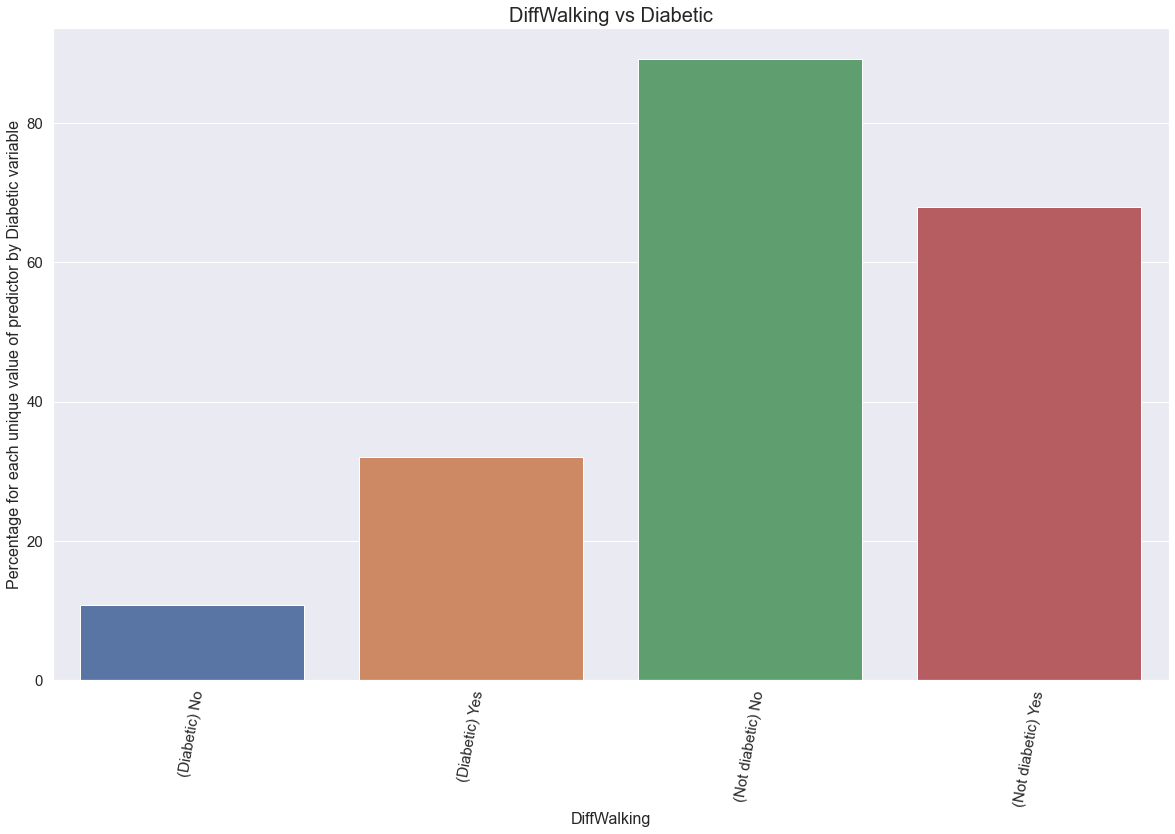

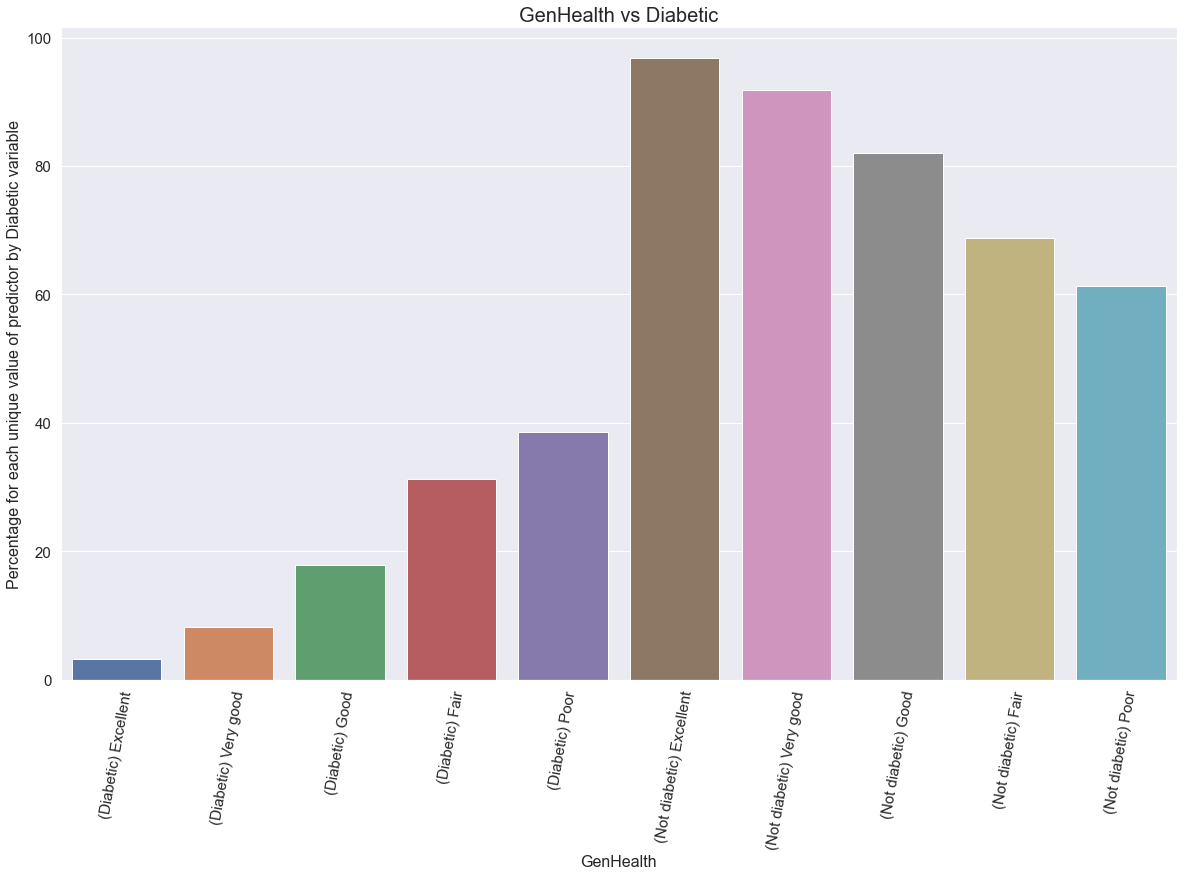

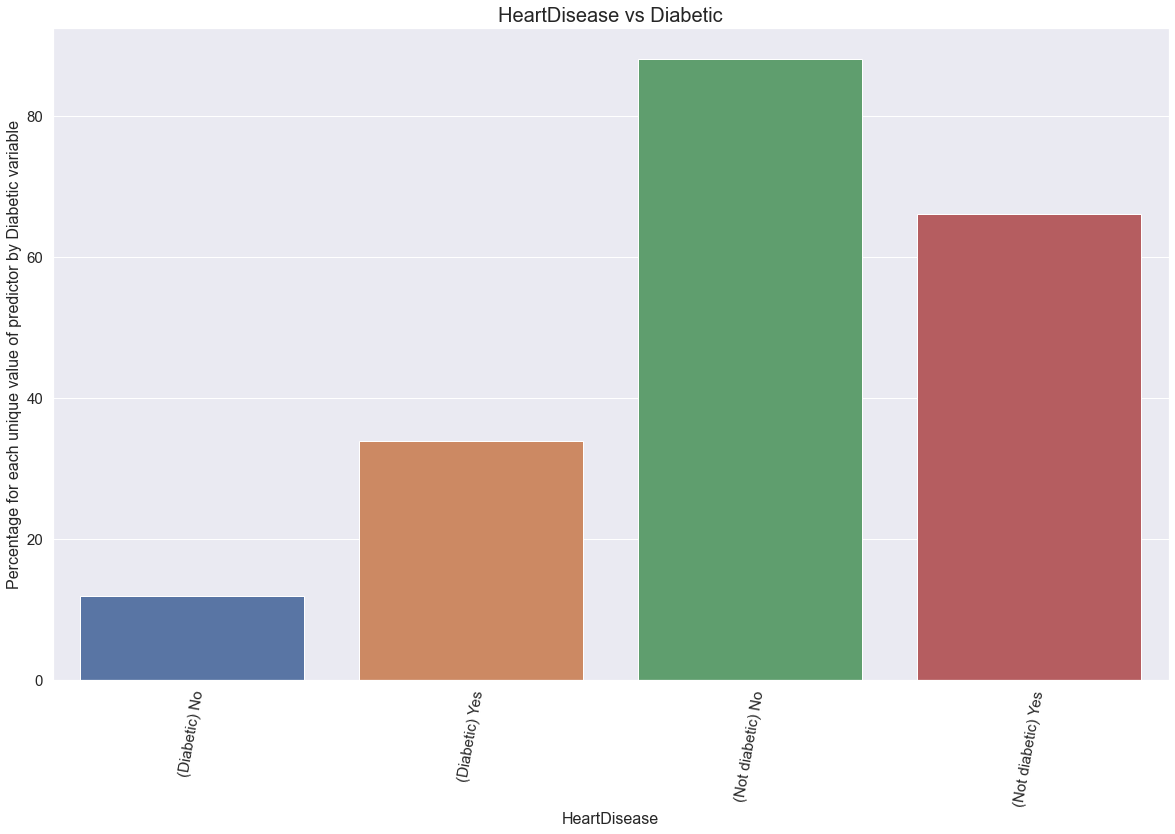

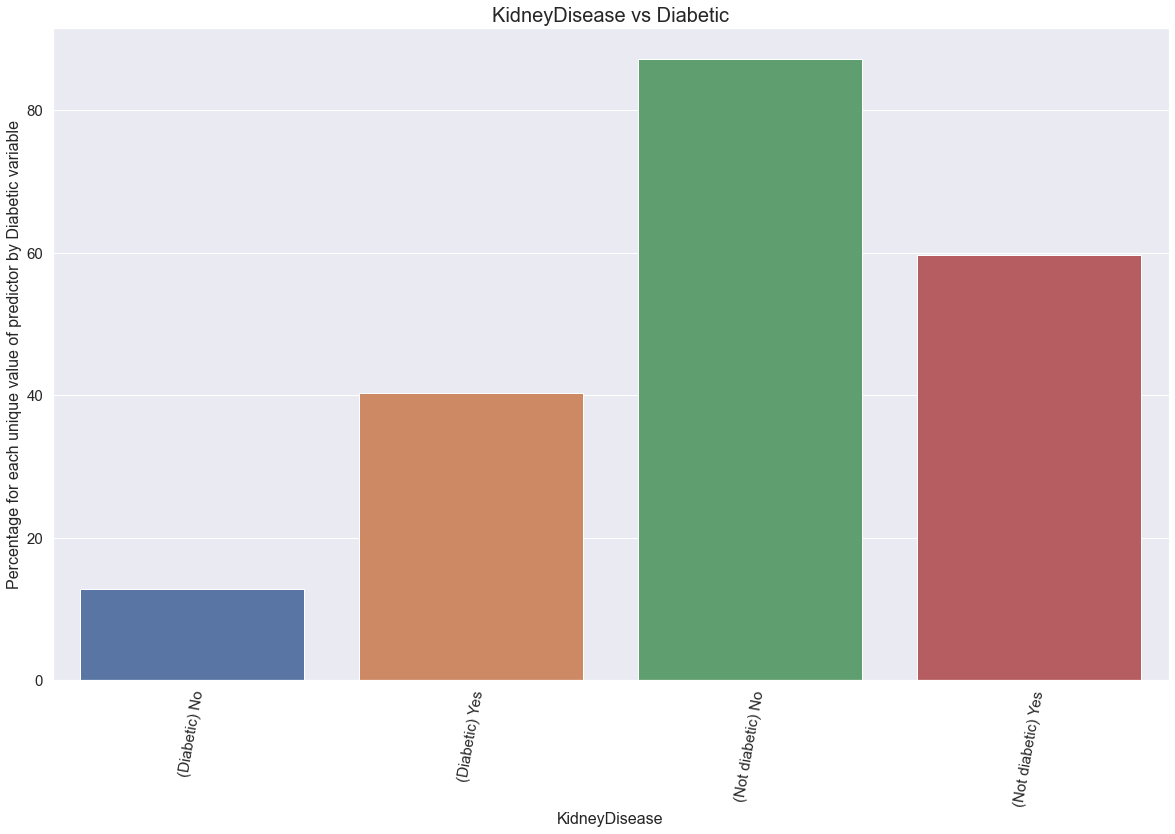

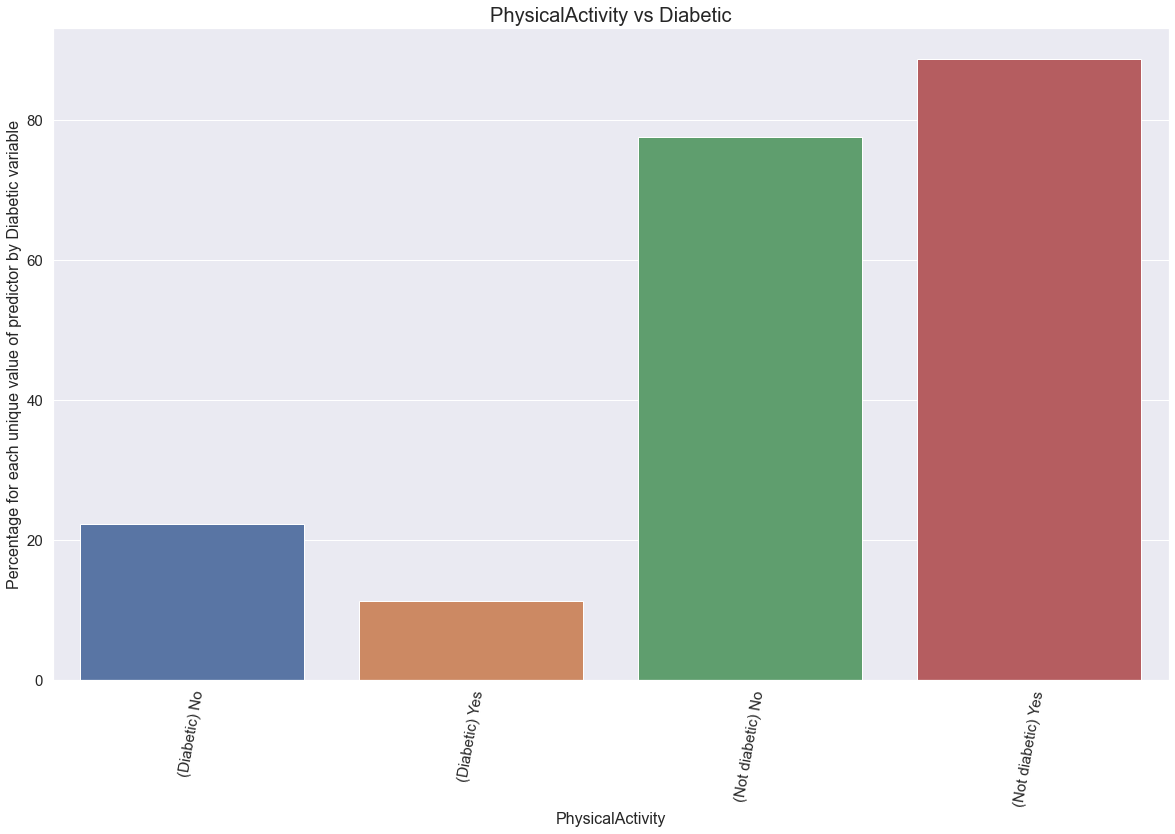

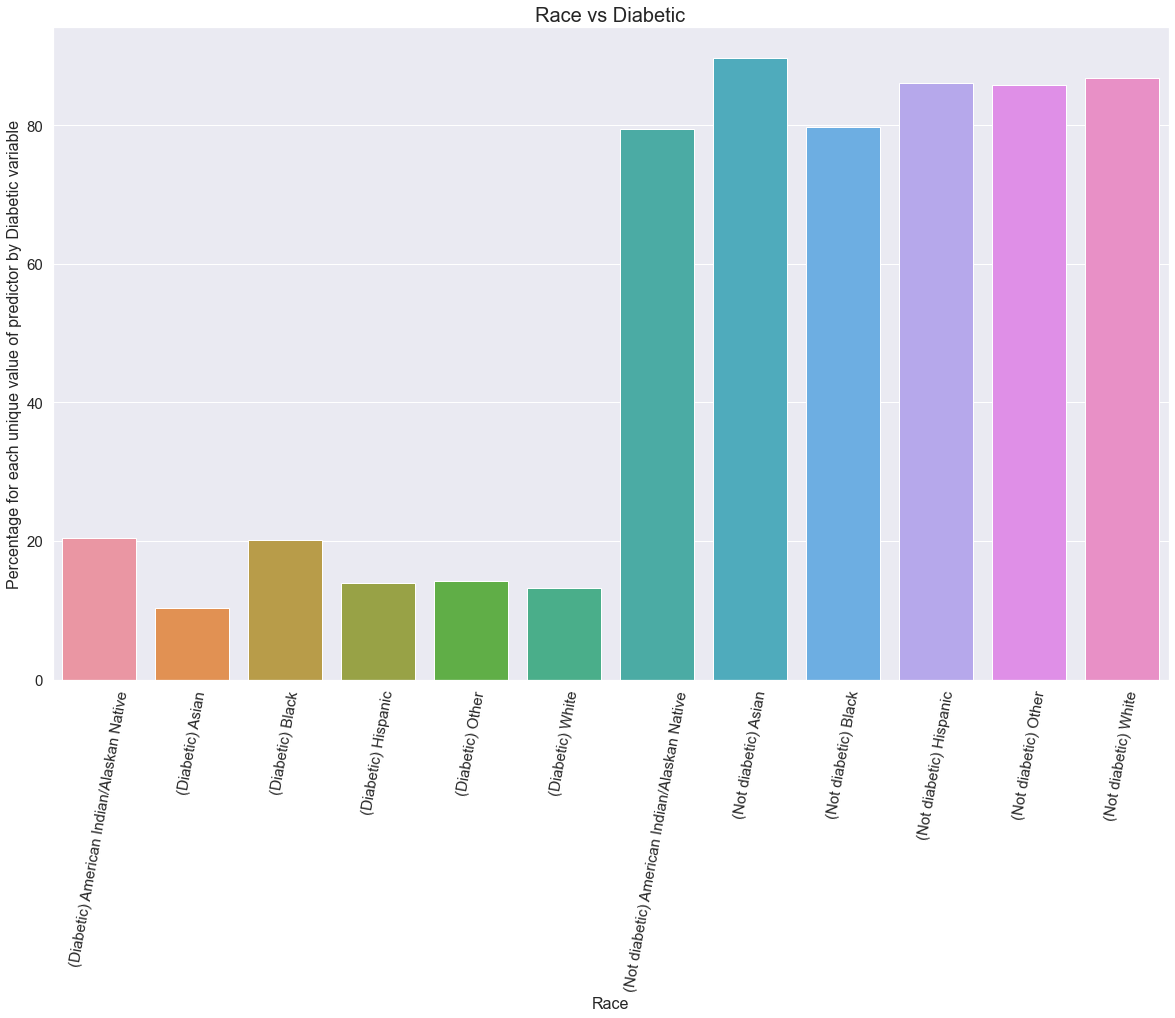

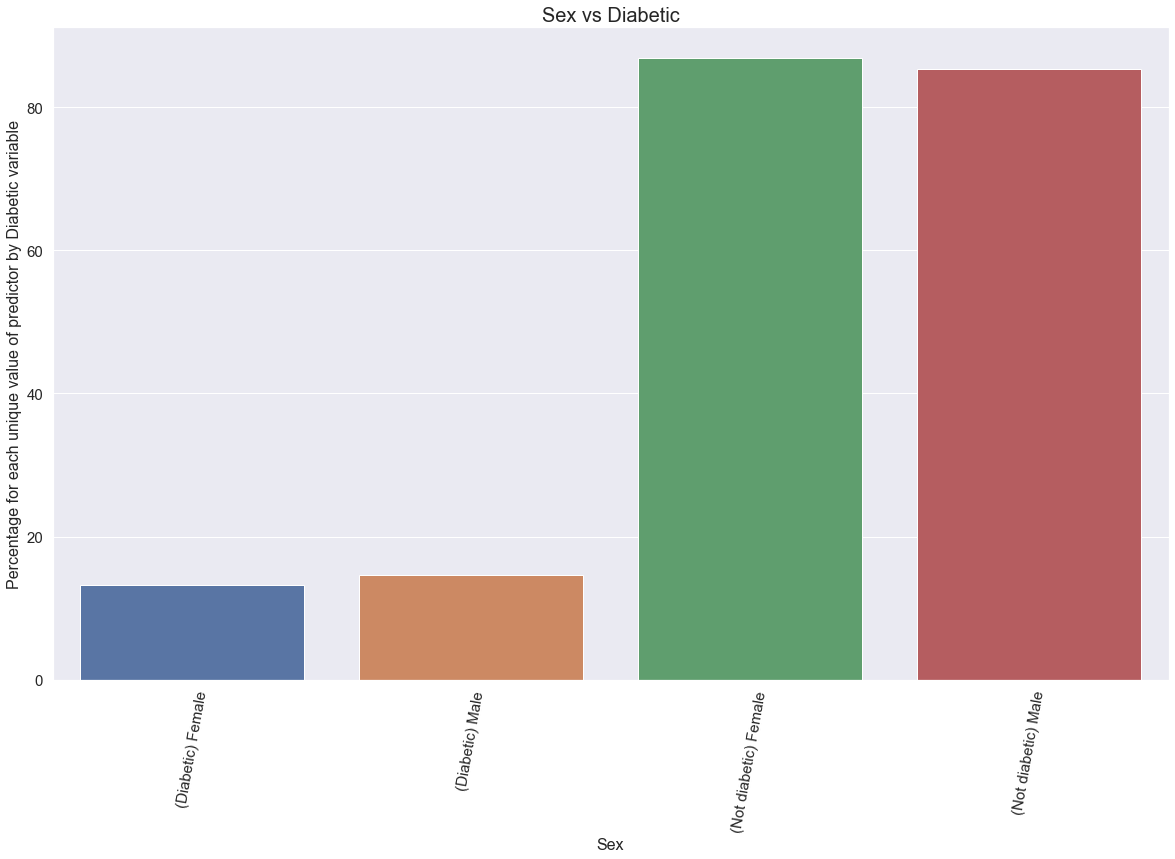

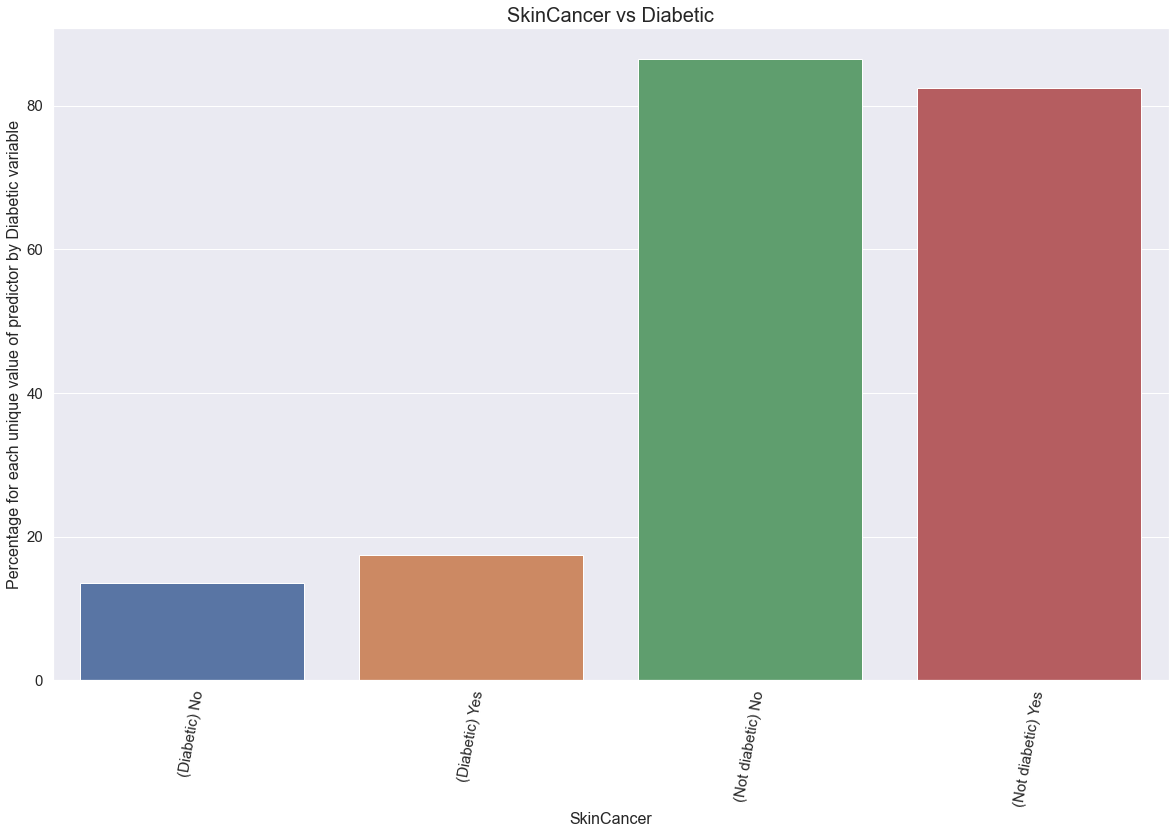

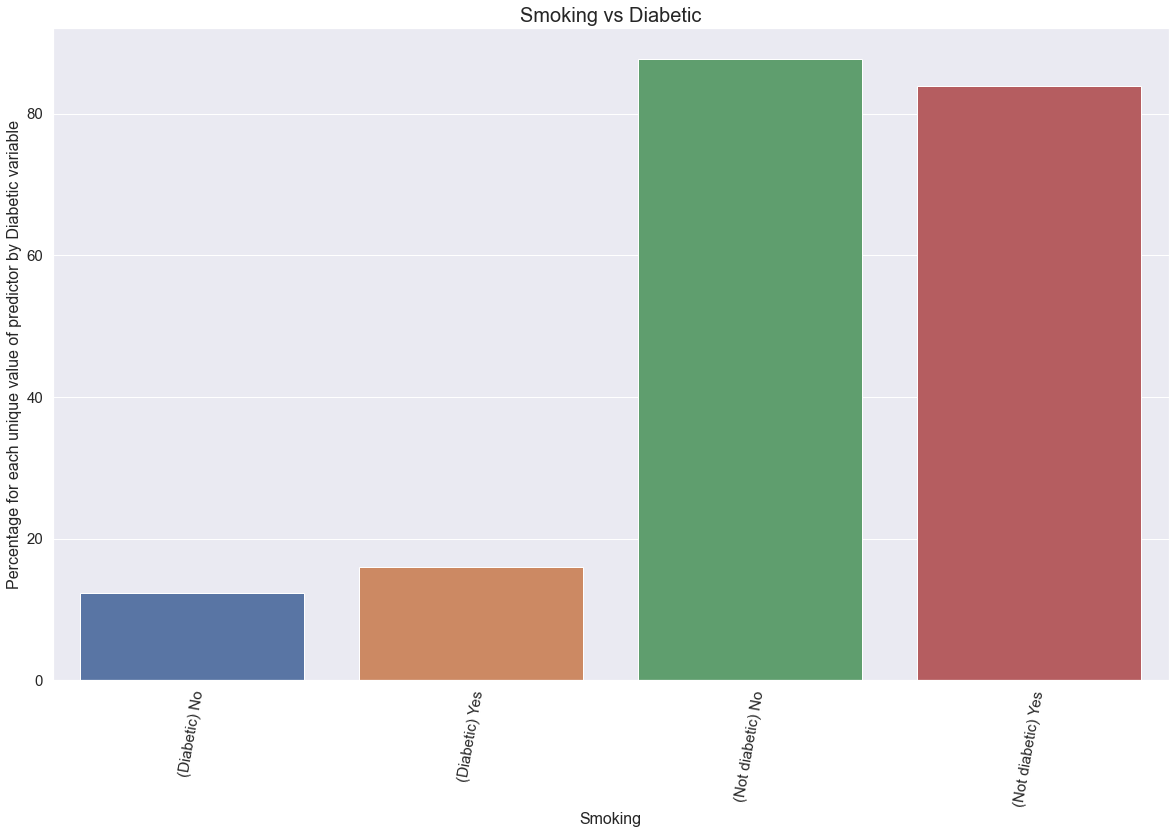

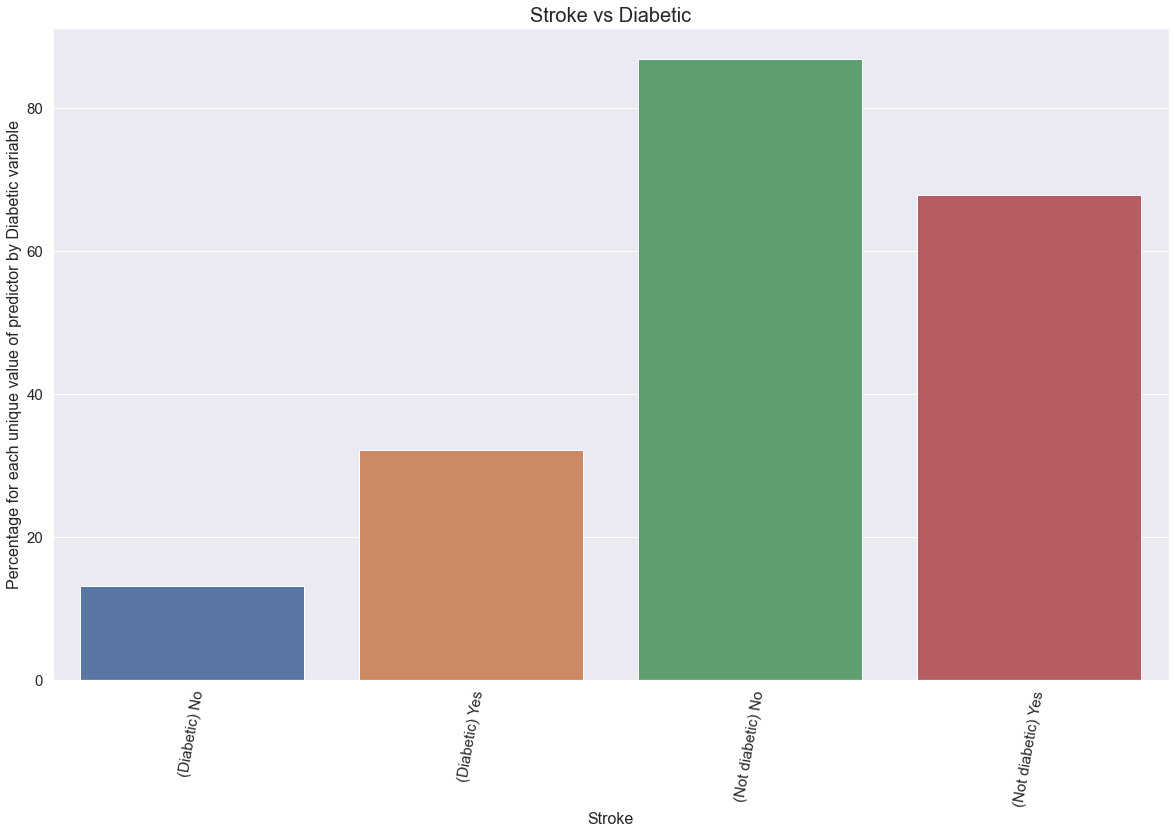

In [26]:
# Plotting bar charts to find the relationshiop
index = 0
for var in predictor_categorical:
    numUnique = numUniqueDict[var]
    varDF = pctDF.iloc[index:index + 2*numUnique]
    plt.figure(figsize=(20, 12))
    sb.barplot(data=varDF, x='UniqueValue', y='Percentage')
    plt.title(var + ' vs Diabetic', fontsize=20, fontweight=15)
    plt.xticks(rotation=80, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(varDF.loc[index, 'Predictor'], fontsize=16)
    plt.ylabel('Percentage for each unique value of predictor by Diabetic variable', fontsize=16)
    plt.show()
    index += 2*numUnique

Based on the bar plots, the presence of diseases or medical conditions (heart disease, kidney disease, stroke and difficulty in walking) is correlated with a higher overall percentage of individuals with diabetes. For example, the percentage of diabetic individuals with heart disease is higher than those without heart disease. Conversely, the percentage of non-diabetic individuals with heart disease is lower than those without heart disease. The notable exceptions here are skin cancer and asthma with relatively similar percentage of diabetic individuals regardless of illness.

Physical activity is correlated with a lower overall percentage of diabetic individuals and smoking is correlated with a higher overall percentage of diabetic individuals as we would expect. However, alcohol drinking is an exception. There is a lower percentage of diabetic individuals amongst alcohol drinkers than amongst non-alcohol drinkers.

Generally, there is a clear association between general health condition and being diabetic as better health rating is correlated with a lower percentage of diabetic individuals.

For the age category, in general, as the age increases, the percentage of diabetic individuals increases.

There appears to be a relation between race and diabetes as some races have higher percentages.

On the other hand, sex does not seem to be related to diabetes and the percentage of males and females with diabetes are similar.

**From this bar-plot analysis, we can see that each predictor variable except `SkinCancer`, `Asthma` and `Sex` shows an evident relationship with `Diabetic` variable.**


### **Chi-square Test of Independence**

Since our response variable - `Diabetic` is a categorical variable, we will use chi-square test of independence as an additional test to evaluate whether there is an association between each categorical variable (predictor variable) and the response variable.

To begin, we will analyse the association between each categorical variable and the `Diabetic` variable by formulating two hypotheses, the null hypothesis H<sub>0</sub> and the alternative hypothesis H<sub>1</sub>:

**H<sub>0</sub>: The two categorical variables (predictor and `Diabetic` variables) have no relationship.**

**H<sub>1</sub>: There is a relationship between the predictor and `Diabetic` variables.**

For this test, there are parameters which we need to consider.
  
The first parameter is the <strong>number of degrees of freedom</strong>, denoted by ν (nu, pronounced "nee"):

**ν = (# rows -1) * (# columns - 1)**

where # rows is the number of unique values in the predictor variable and # columns is the number of unique values in `Diabetic` variable.

The other two parameters are <strong>significance level</strong> and <strong>critical value</strong>.  
  
<strong>Significance level</strong>, denoted by α, is the probability of rejection of null hypothesis when it is in fact true.  
Here, we will consider 5% significance level initially which means there is a 5% chance that a true null hypothesis will be rejected.
  
<strong>Critical value</strong> can be extracted from a chi-square distribution table which depends on the significance level, α and degrees of freedom, ν. Below is a general chi-square distribution table.  

<img src = 'https://programmathically.com/wp-content/uploads/2021/04/Chi-Square-table-1536x1445.png' alt = 'Chi-squared table'>  

<strong>Fig. 1: <em>Chi-square distribution table<em> (Seb, 2021)</strong>

Next, there are evaluation metrics through which we can arrive at the conclusion of this test, namely the <strong>Pearson chi-square test statistic</strong> as well as further support such conclusion, namely the <strong>Cramér's V</strong> and <strong>Tsuchuprow's T</strong>

The first crucial evaluation metric - <strong>Pearson chi-square test statistic</strong>, denoted by χ2 can be determined as follows:  

<img src = 'https://miro.medium.com/max/808/1*SG-NUDfemymJUoo_XyM--A.png' alt = 'Chi-squared test statistic formula'>

where O is the observed value for each cell and E is the expected frequency.

If the χ2 value obtained exceeds the critical value on certain significance level and degrees of freedom, the null hypothesis will be rejected. In other words, there is no statistical association between the predictor and the <code>Diabetic</code> variables. Otherwise, we will not reject the null hypothesis and there is a statistical association between those two variables.

<strong>P-value</strong> is the area of the region under the chi-square distribution curve that is greater than the critical value. It works similarly with chi-square test statistic. It is used as an alternative test statistic when the chi-square test statistic is quite large. This is because a very large chi-square test statistic always means the null hypothesis is rejected. We will use Scipy modules to determine the P-value. If the p-value is less than or equal to the significance level, we will reject the null hypothesis. Otherwise, we will reject it.

Both <strong>Cramér's V</strong> and <strong>Tsuchuprow's T</strong> are used to measure the strength of association between two categorical variables, giving a value between 0 and +1 (inclusive). Tsuchuprow's T is closely related to Cramér's V. Higher value means stronger association and vice versa. 

<strong>Cramér's V</strong>, denoted by V, <strong>Tsuchuprow's T</strong> denoted by T can be determined as follows:  

<img src="https://lh3.googleusercontent.com/d/1hQ_57yTHmzU_STdUHUwEJjhCT2WIz1f8" alt = 'CramerV and TsuchuprowT formulae'>

where
χ2 is the Pearson's chi-squared test statistic, N is the number of samples, r is the number of rows and c is the number of columns.

**Chi-square test of independence between `GenHealth` (predictor) and `Diabetic` (response)**

Let us consider `GenHealth` as a predictor variable and `Diabetic` as a response variable.  

Formulating the hypotheses:  

**H<sub>0</sub>: `GenHealth` and `Diabetic` have no relationship.**

**H<sub>1</sub>: There is a relationship between `GenHealth` and `Diabetic`.**

The significance level we will use is 5%.

Let us construct a contingency table for both variables.

In [27]:
# Extract the GenHealth and Diabetic variables from the data
GenHealth = cleaned['GenHealth'] # Predictor variable
Diabetic = cleaned['Diabetic']   # Response variable

In [28]:
# Contingency table between these two variables
contingencyTable = pd.crosstab(GenHealth, Diabetic)
contingencyTable

Diabetic,No,Yes
GenHealth,,
Excellent,56597,1896
Fair,22856,10392
Good,72184,15763
Poor,6674,4197
Very good,93485,8341


In [29]:
# Print the number of rows and columns of the contingency table
row = contingencyTable.shape[0]
col = contingencyTable.shape[1]
print('Number of rows:', row)
print('Number of columns:', col)

Number of rows: 5
Number of columns: 2


Let us import scipy modules to help us calculate the essential metrics.

In [30]:
import scipy.stats as ss

In [31]:
# Determining test statistic, p-value, degrees of freedom used and expected values count
chiVal, pVal, degFree, expCount = ss.chi2_contingency(contingencyTable)

In [32]:
# Print the essential metrics
print('Chi-square test statistic:', chiVal.round(4))
print('p-value:', pVal)
print('Degrees of freedom:', degFree)

Chi-square test statistic: 23453.47
p-value: 0.0
Degrees of freedom: 4


From the chi-square distribution table, with 5% significance level and degrees of freedom of 4, the critical value is 9.488. Since the chi-square test statistic we obtain exceeds the critical value, we reject the null hypothesis in favour of the alternative hypothesis. We arrive at the conclusion that there is a statistical association between the `GenHealth` and `Diabetic` variables.  

In fact, we obtain an extremely large chi-square test statistic value and it exceeds every value inside the chi-square distribution table. Let us use p-value instead. The p-value we obtain also exceeds the significance level of 5%. Statistically, we can be nearly 100% confident that there exists a statistical relationship between `GenHealth` and `Diabetic`.

Let us determine the Cramér's V and Tsuchuprow's T.

In [33]:
# Function to calculate Cramer's V
def calcCramerV(chisquareVal, N, row, column):
    return np.sqrt(chisquareVal/(N*min(row-1, column-1)))

# Function to calculate Tsuchuprow's T
def calcTsucT(chisquareVal, N, row, column):
    return np.sqrt(chisquareVal/(N*np.sqrt((row-1)*(column-1))))

In [34]:
# Calculate and print both Cramer's V and Tsuchuprow's T values
cramerV = calcCramerV(chiVal, Diabetic.shape[0], row, col)
tsucT = calcTsucT(chiVal, Diabetic.shape[0], row, col)

print("Cramer's V:", cramerV.round(4))
print("Tsuchuprow's T:", tsucT.round(4))

Cramer's V: 0.2832
Tsuchuprow's T: 0.2003


Both values show that the relationship between `GenHealth` and `Diabetic` is fairly weak.

**In general, from the chi-square test of independence, we infer the existence of statistical relationship and its strength can be determined by both Cramér's V and Tsuchuprow's T values.**

**Chi-square Test of Independence on Other Categorical Variables**

Now, we will perform chi-square test of independence on all categorical variables against `Diabetic`. We will display all the essential metrics and conclusion on a dataframe.

In [35]:
# Storing essential metrics
chiSquareTest = {'Predictor': predictor_categorical, 'DegFreedom':[], 'p-value': [], 'ChiSquareValue':[], 'RelationshipWithDiabetic':[]}

In [36]:
# Loop through all predictor variables to calculate the metrics
for var in predictor_categorical:

    predictor = cleaned[var]  # Predictor variable
    
    # Constructing contingency table for each predictor variable vs Diabetic
    contingencyTable = pd.crosstab(predictor, Diabetic)
    
    # Determining test statistic, p-value, degrees of freedom used and expected values count
    chiVal, pVal, degFree, expCount = ss.chi2_contingency(contingencyTable)
    
    # Store the metrics
    chiSquareTest['DegFreedom'].append(degFree)
    chiSquareTest['p-value'].append(pVal)
    chiSquareTest['ChiSquareValue'].append(chiVal.round(4))

In [37]:
print(chiSquareTest)

{'Predictor': ['AgeCategory', 'AlcoholDrinking', 'Asthma', 'DiffWalking', 'GenHealth', 'HeartDisease', 'KidneyDisease', 'PhysicalActivity', 'Race', 'Sex', 'SkinCancer', 'Smoking', 'Stroke'], 'DegFreedom': [12, 1, 1, 1, 4, 1, 1, 1, 5, 1, 1, 1, 1], 'p-value': [0.0, 1.86738441229194e-274, 2.1409188655317455e-101, 0.0, 0.0, 0.0, 0.0, 0.0, 5.728491383040379e-232, 7.57713020930056e-31, 7.842554555001194e-76, 1.136004519716504e-183, 0.0], 'ChiSquareValue': [15657.202, 1252.9811, 457.0191, 13760.3646, 23453.47, 9749.9972, 6946.2172, 5422.2576, 1083.2284, 133.3507, 339.5886, 835.3093, 3386.1964], 'RelationshipWithDiabetic': []}


In DegFreedom list, there are 1, 4, 5 and 12 values. Let us store the their corresponding critical values on 5% significance level.

In [38]:
# Critical value based on 5% significance level and degrees of freedom (key)
criticalVal = {1:3.841, 4:9.488, 5:11.071, 12:21.026}

Then, we can find the conclusion using those critical values.

In [39]:
# Looping through all degrees of freedom stored
for i in range(len(chiSquareTest['DegFreedom'])):
    df = chiSquareTest['DegFreedom'][i]
    cqVal = chiSquareTest['ChiSquareValue'][i]
    if(cqVal >= criticalVal[df]):
        chiSquareTest['RelationshipWithDiabetic'].append('Yes')
    else:
        chiSquareTest['RelationshipWithDiabetic'].append('No')

In [40]:
# Construct a dataframe to display the metrics and conclusion
chiSquareDF = pd.DataFrame(chiSquareTest)
chiSquareDF

,Predictor,DegFreedom,p-value,ChiSquareValue,RelationshipWithDiabetic
0,AgeCategory,12,0.000000e+00,15657.2020,Yes
1,AlcoholDrinking,1,1.867384e-274,1252.9811,Yes
2,Asthma,1,2.140919e-101,457.0191,Yes
3,DiffWalking,1,0.000000e+00,13760.3646,Yes
4,GenHealth,4,0.000000e+00,23453.4700,Yes
5,HeartDisease,1,0.000000e+00,9749.9972,Yes
6,KidneyDisease,1,0.000000e+00,6946.2172,Yes
7,PhysicalActivity,1,0.000000e+00,5422.2576,Yes
8,Race,5,5.728491e-232,1083.2284,Yes
9,Sex,1,7.577130e-31,133.3507,Yes


Earlier, we deduced asthma, sex and skin cancer have negligible relationships with <code>Diabetic</code>.  

The chi-squared test of independence provides us different insights that asthma, sex and skin cancer are somewhat related to <code>Diabetic</code>.

**We see that all predictor variables have a relationship with <code>Diabetic</code>.**

Let us determine Cramér's V and Tsuchuprow's T values for all predictor variables.

In [41]:
# Storing Cramér's V and Tsuchuprow's T values
chiSquareSupport = {'CramerV':[], 'TsuchuprowT':[]}

In [42]:
# Loop through all predictor variables to calculate the Cramér's V and Tsuchuprow's T values
for var in predictor_categorical:

    predictor = cleaned[var]  # Predictor variable
    
    # Constructing contingency table for each predictor variable vs Diabetic
    contingencyTable = pd.crosstab(predictor, Diabetic)
    
    # Determining test statistic, p-value, degrees of freedom used and expected values count
    chiVal, pVal, degFree, expCount = ss.chi2_contingency(contingencyTable)
    
    # Determining Cramér's V and Tsuchuprow's T values
    cramerV = calcCramerV(chiVal, Diabetic.shape[0], contingencyTable.shape[0], contingencyTable.shape[1])
    tsucT = calcTsucT(chiVal, Diabetic.shape[0], contingencyTable.shape[0], contingencyTable.shape[1])
    
    # Store the Cramér's V and Tsuchuprow's T values
    chiSquareSupport['CramerV'].append(cramerV.round(4))
    chiSquareSupport['TsuchuprowT'].append(tsucT.round(4))

In [43]:
# Construct a dataframe to display the values
chiSquareSupDF = pd.DataFrame(chiSquareSupport)
chiSquareSupDF

,CramerV,TsuchuprowT
0,0.2314,0.1243
1,0.0655,0.0655
2,0.0395,0.0395
3,0.2169,0.2169
4,0.2832,0.2003
5,0.1826,0.1826
6,0.1541,0.1541
7,0.1362,0.1362
8,0.0609,0.0407
9,0.0214,0.0214


In [44]:
chiSquareAnalysis = pd.concat([chiSquareDF, chiSquareSupDF], axis=1)
chiSquareAnalysis

,Predictor,DegFreedom,p-value,ChiSquareValue,RelationshipWithDiabetic,CramerV,TsuchuprowT
0,AgeCategory,12,0.000000e+00,15657.2020,Yes,0.2314,0.1243
1,AlcoholDrinking,1,1.867384e-274,1252.9811,Yes,0.0655,0.0655
2,Asthma,1,2.140919e-101,457.0191,Yes,0.0395,0.0395
3,DiffWalking,1,0.000000e+00,13760.3646,Yes,0.2169,0.2169
4,GenHealth,4,0.000000e+00,23453.4700,Yes,0.2832,0.2003
5,HeartDisease,1,0.000000e+00,9749.9972,Yes,0.1826,0.1826
6,KidneyDisease,1,0.000000e+00,6946.2172,Yes,0.1541,0.1541
7,PhysicalActivity,1,0.000000e+00,5422.2576,Yes,0.1362,0.1362
8,Race,5,5.728491e-232,1083.2284,Yes,0.0609,0.0407
9,Sex,1,7.577130e-31,133.3507,Yes,0.0214,0.0214


The Cramér's V and Tsuchuprow's T values for each categorical variable are low. This means that the statistical relationship between each categorical variable and `Diabetic` variable is weak. We see that the strength of relationship between `GenHealth` and `Diabetic` is the strongest while that between `Sex` and `Diabetic` is the weakest.

**The chi-square test of independence shows all categorical variables have a relationship with `Diabetic` variable. However, the strength of each relationship is in the weak range as shown by the low values of Cramér's V and Tsuchuprow's T values.**

---

## **Data Preparation**

Based on our initial exploratory data analysis, we decided to use <code>BMI</code>, <code>SleepTime</code>, <code>AgeCategory</code> and <code>GenHealth</code> as the predictors for our model.

Reasons:

* <code>Diabetic</code> has a relationship with <code>BMI</code> and <code>SleepTime</code>.
* The strongest 2 categorical relationships that <code>Diabetic</code> has are with <code>AgeCategory</code> and <code>GenHealth</code>.

In [45]:
# declare the predictors and response variable
predictors = ["BMI", "SleepTime", "AgeCategory", "GenHealth"]
response = "Diabetic"

### **Removing outliers for numeric variables**

Based on the boxplot for both <code>BMI</code> and <code>SleepTime</code>, there were many outliers in the data. As they could potentially influence the model significantly, we decided to drop all the outliers highlighted by the boxplot.

In [46]:
def get_lower_upper_bound(data: pd.DataFrame, variable: str) -> tuple:
    """Function to get the whiskers of the boxplot"""
    lower_quartile = cleaned[variable].quantile(0.25)
    upper_quartile = cleaned[variable].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * IQR
    upper_bound = upper_quartile + 1.5 * IQR
    return lower_bound, upper_bound

In [47]:
def drop_outliers(data: pd.DataFrame, variable: str, lower_bound: float, upper_bound: float) -> pd.DataFrame:
    """Function to drop the outliers based on the boxplot"""
    data = data.drop(index = data[data[variable] < lower_bound].index)
    data = data.drop(index = data[data[variable] > upper_bound].index)
    return data

In [48]:
# drop the outliers based on the boxplot
lower_bound_BMI, upper_bound_BMI = get_lower_upper_bound(cleaned, "BMI")
lower_bound_SleepTime, upper_bound_SleepTime = get_lower_upper_bound(cleaned, "SleepTime")
cleaned = drop_outliers(cleaned, "BMI", lower_bound_BMI, upper_bound_BMI)
cleaned = drop_outliers(cleaned, "SleepTime", lower_bound_SleepTime, upper_bound_SleepTime)

# reset index
cleaned.reset_index(drop = True, inplace = True)

# summary statistics 
cleaned[["BMI", "SleepTime"]].describe()

,BMI,SleepTime
count,279746.000000,279746.000000
mean,27.779279,7.054610
std,5.368777,1.253252
min,12.480000,3.000000
25%,23.780000,6.000000
50%,27.200000,7.000000
75%,31.100000,8.000000
max,43.100000,11.000000


<AxesSubplot:title={'center':'Histogram of SleepTime'}, xlabel='SleepTime', ylabel='Count'>

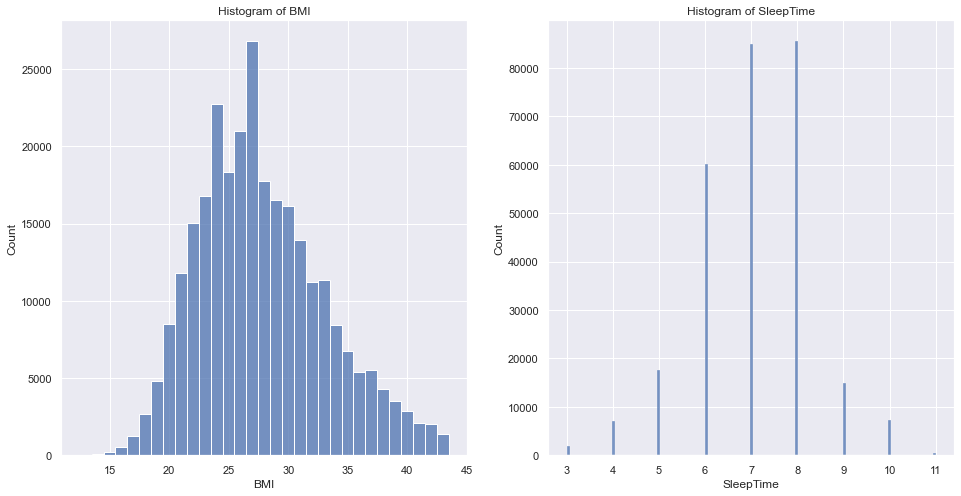

In [49]:
# set up figure
figure, axes = plt.subplots(1, 2, figsize = (16, 8))
axes[0].set_title("Histogram of BMI")
axes[1].set_title("Histogram of SleepTime")

# data visualization after removing outliers
sb.histplot(data = cleaned, x = "BMI", ax = axes[0], binwidth = 1)
sb.histplot(data = cleaned, x = "SleepTime", ax = axes[1])

Previously, we also saw that <code>BMI</code> data was pretty skewed. However, after dropping the outliers, the skew in <code>BMI</code> seems to have dropped to a reasonable level. So no further transforms will be needed to normalize the distribution.

In [50]:
# Evaluating skew 
print("Variable\t Skew")
cleaned[["BMI", "SleepTime"]].skew()

Variable	 Skew


BMI          0.495743
SleepTime   -0.275618
dtype: float64

### **Sampling: Constructing the train test split**

In [51]:
# Slice out the predictors and response variable
X = cleaned[predictors]
Y = cleaned[response]

In [52]:
# train test split
train_x, test_x, train_y, test_y = train_test_split(
    X, Y, test_size = 0.2, random_state = random_state
    )

# resetting index
train_x.reset_index(drop = True, inplace = True)
train_y.reset_index(drop = True, inplace = True)
test_x.reset_index(drop = True, inplace = True)
test_y.reset_index(drop = True, inplace = True)

**Test Data Sampling Strategy : Downsampling and Upweighting**

Our dataset is moderately imbalanced with 13.2% of all our data being the minority class(Yes). As such, we decided to follow the strategy of downsampling and upweighting to handle the class imbalance. 

According to the Google Developers Guide on handling data imbalance, downsampling will help the model to converge faster and upweighting will allow the outputs to still be interpreted as probabilities. (Google Developers, 2011)

To avoid influencing the l2 regularization for the logistic regression model, the sum of the class weights will be scaled down to 1.

Text(0.5, 1.0, 'Countplot of the number of individuals with diabetes')

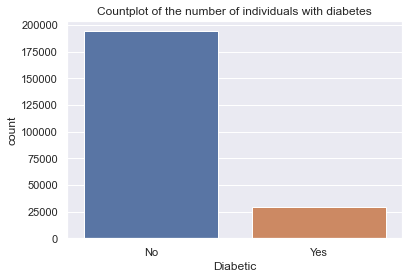

In [53]:
# count plot 
sb.countplot(x = train_y)
plt.title("Countplot of the number of individuals with diabetes")

In [54]:
# Number of datapoints pre downsampling
print("Diabetic \tCount")
print(f"Yes \t\t{(train_y == 'Yes').sum()}")
print(f"No \t\t{(train_y == 'No').sum()}")

Diabetic 	Count
Yes 		29537
No 		194259


In [55]:
# downsampling
undersampler = RandomUnderSampler(
    sampling_strategy = "majority", random_state = random_state
    )
train_x, train_y = undersampler.fit_resample(train_x, train_y)

# Number of datapoints post downsampling
print("Diabetic \tCount")
print(f"Yes \t\t{(train_y == 'Yes').sum()}")
print(f"No \t\t{(train_y == 'No').sum()}")

# reseting index
train_x.reset_index(drop = True, inplace = True)
train_y.reset_index(drop = True, inplace = True)

Diabetic 	Count
Yes 		29537
No 		29537


In [56]:
# upweighting 
class_weight = {"Yes": 1, "No": (train_y == 'No').sum() / (train_y == 'No').sum()}
class_weight = {"Yes": class_weight["Yes"]/(class_weight["Yes"] + class_weight["No"]), 
                "No": class_weight["No"]/(class_weight["Yes"] + class_weight["No"])}

### **Transformations**

The last part of our data preparation pipeline would be to apply transformations to the data. 

The 3 transformations we will be applying are:

1. Scaling numeric data such that the <code>mean = 0</code> and <code>standard deviation = 1</code>, 
2. Applying <code>PolynomialFeature</code> transform for SleepTime, and
3. One-hot encoding for categorical data.

The exact same transformations will be applied to both our train and test data.

In [57]:
def data_prep(train: pd.DataFrame, test: pd.DataFrame) -> tuple:
  """Function to standardize the data prep for both train and test data"""

  # applying standard scaling to BMI
  scaler = StandardScaler()
  train[["BMI"]] = scaler.fit_transform(train[["BMI"]])
  test[["BMI"]] = scaler.transform(test[["BMI"]])

  # applying standard scaling to SleepTime
  scaler = StandardScaler()
  train[["SleepTime"]] = scaler.fit_transform(train[["SleepTime"]])
  test[["SleepTime"]] = scaler.transform(test[["SleepTime"]])

  # applying quadratic feature to SleepTime
  transform = PolynomialFeatures(degree = 2)
  train_SleepTime = pd.DataFrame(data = transform.fit_transform(train[["SleepTime"]])[:,1:], columns = ["SleepTime", "SleepTime^2"])
  test_SleepTime = pd.DataFrame(data = transform.transform(test[["SleepTime"]])[:,1:], columns = ["SleepTime", "SleepTime^2"])
  train = train.drop(columns = ["SleepTime"])
  test = test.drop(columns = ["SleepTime"])
  train = pd.concat([train, train_SleepTime], axis = 1)
  test = pd.concat([test, test_SleepTime], axis = 1)

  # One-hot encoding for categorical variables
  train = pd.get_dummies(train)
  test = pd.get_dummies(test)

  return train, test

In [58]:
# data prep
train_x, test_x = data_prep(train_x, test_x)

## **Model Training**

We decided to train two different classifiers to predict the probability of diabetes. The first model is a <code>LogisticRegression</code> model and the other is a <code>RandomForestClassifier</code> model.

We will be comparing the models in 5 different ways:

1. Accuracy of predictions
2. False positive rate
3. False negative rate
4. AUC score
5. Feature importance

In [59]:
# dataframe to collate the results from the different models
results = pd.DataFrame(columns = ["Accuracy", "FPR", "FNR", "AUC"], index = ["Logistic Regression", "Random Forest Classifier"])

### **Logistic Regression Model**

Assumptions of <code>LogisticRegression</code>:

1. The observations are independent of each other.
2. There to be little or no multicollinearity among the independent variables.
3. Assumes linearity of independent variables and log odds.

We dropped all all forms of duplicated data in our data cleaning phase so there is no repeated measurements or matched data within our dataset so the first assumption is met.

However for the remaining assumptions for <code>LogisticRegression</code>, we have assumed them to be true.

Test Data
              precision    recall  f1-score   support

         Yes       0.95      0.69      0.80     48614
          No       0.27      0.77      0.40      7336

    accuracy                           0.70     55950
   macro avg       0.61      0.73      0.60     55950
weighted avg       0.86      0.70      0.75     55950



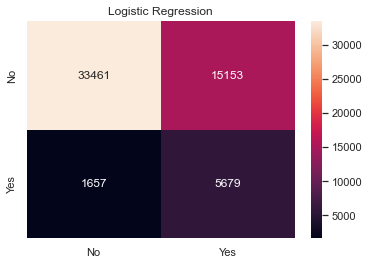

In [60]:
# create the model
model = LogisticRegression(class_weight = class_weight, max_iter = 1000)
model.fit(train_x, train_y)

# test the model
predictions = model.predict(test_x)
print("Test Data")
print(classification_report(test_y, predictions, target_names = ["Yes", "No"]))
sb.heatmap(
    data = pd.DataFrame(
        data = confusion_matrix(test_y, predictions), 
        columns = ["No" , "Yes"], index = ["No", "Yes"]
        ), 
    annot = True, fmt = "d")
plt.title("Logistic Regression")
# plt.savefig("Logistic Regression")

# record data
results.loc["Logistic Regression", "Accuracy"] = model.score(test_x, test_y)
data = confusion_matrix(test_y, predictions)
results.loc["Logistic Regression", "FPR"] = (data[0,1] / np.sum(data[0]))
results.loc["Logistic Regression", "FNR"] = (data[1,0] / np.sum(data[1]))

<AxesSubplot:title={'center':'Feature importances'}, ylabel='Relative importance'>

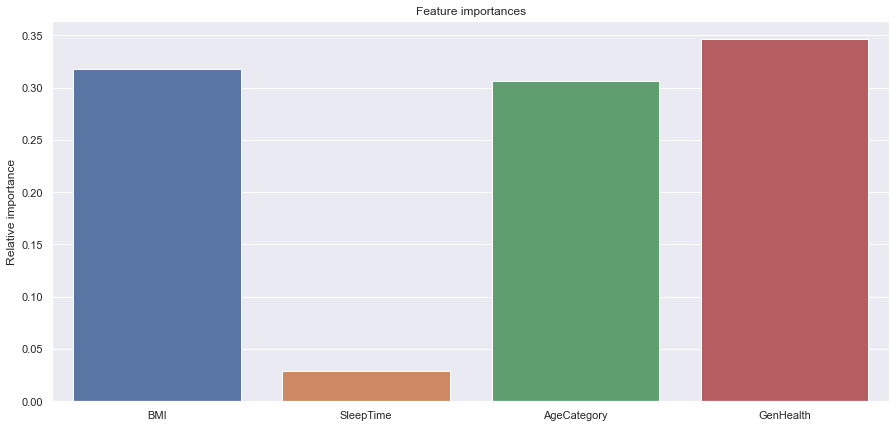

In [61]:
# rank the predictors in terms of importance
ranking = pd.DataFrame(columns = predictors, data = [[0 for _ in predictors]])
selector = RFE(model, n_features_to_select = 1)
selector.fit(train_x, train_y)
importances = (len(train_x.columns) - selector.ranking_)
for variable_name, importance in zip(test_x.columns, importances):
  for predictor in predictors:
    if variable_name.find(predictor) != -1:
      ranking[predictor] += importance
ranking['GenHealth'] /= len([col for col in test_x.columns if col.find("GenHealth") != -1])
ranking['AgeCategory'] /= len([col for col in test_x.columns if col.find("AgeCategory") != -1])
total = ranking.sum(axis = 1)
for col in predictors:
  ranking[col] /= total
plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.ylabel("Relative importance")
sb.barplot(data = ranking)
# plt.savefig("Logistic Regression importance")

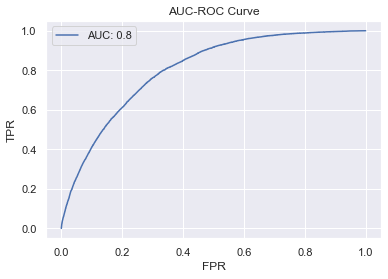

In [62]:
# evaluating via AUC-ROC Curve
predictions = model.predict_proba(test_x)[::,1]
fpr, tpr, _ = roc_curve(test_y, predictions, pos_label = "Yes")
auc = roc_auc_score(test_y, predictions)
plt.plot(fpr, tpr, label=f'AUC: {round(auc, 2)}')
plt.title("AUC-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# recording AUC
results.loc["Logistic Regression", "AUC"] = auc

### **Random Forest Classifier**

No assumptions are needed for the <code>RandomForestClassifier</code> as it is not parametric.

Test Data
              precision    recall  f1-score   support

         Yes       0.94      0.67      0.78     48614
          No       0.25      0.73      0.37      7336

    accuracy                           0.67     55950
   macro avg       0.59      0.70      0.57     55950
weighted avg       0.85      0.67      0.73     55950



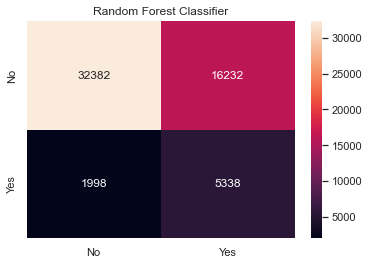

In [63]:
# initialize the random forest classifier 
forest = RandomForestClassifier(n_estimators = 100, random_state= random_state, 
                                max_features = 0.6, min_samples_leaf = 3, n_jobs = -1, 
                                class_weight = class_weight)
forest.fit(train_x, train_y)

# test the model
y_pred = forest.predict(test_x)
print("Test Data")
print(classification_report(test_y, y_pred, target_names = ["Yes", "No"]))
sb.heatmap(
    data = pd.DataFrame(
        data = confusion_matrix(test_y, y_pred, labels = ["No", "Yes"]), 
        columns = ["No" , "Yes"], index = ["No", "Yes"]
        ), 
    annot = True, fmt = "d")
plt.title("Random Forest Classifier")
plt.savefig("Random Forest Classifier")

# record data
results.loc["Random Forest Classifier", "Accuracy"] = forest.score(test_x, test_y)
data = confusion_matrix(test_y, y_pred)
results.loc["Random Forest Classifier", "FPR"] = (data[0,1] / np.sum(data[0]))
results.loc["Random Forest Classifier", "FNR"] = (data[1,0] / np.sum(data[1]))

<AxesSubplot:title={'center':'Feature importances'}, ylabel='Relative importance'>

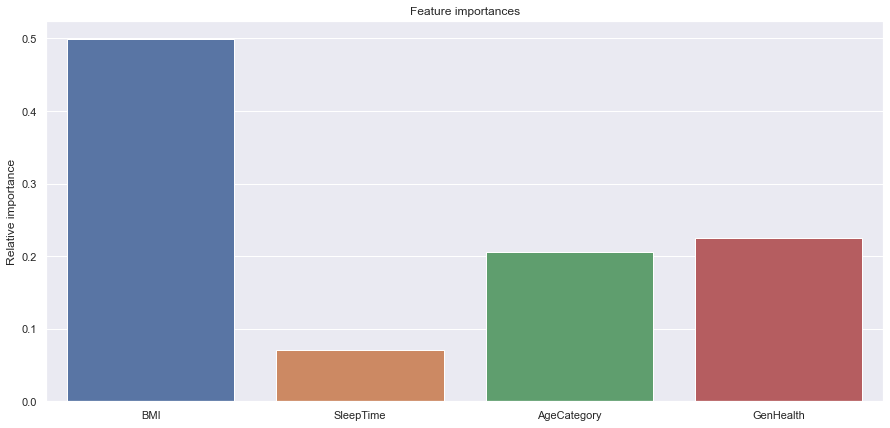

In [64]:
# rank the predictors in terms of importance
ranking = pd.DataFrame(columns = predictors, data = [[0 for _ in predictors]])
importances = forest.feature_importances_
for variable_name, importance in zip(test_x.columns, importances):
  for predictor in predictors:
    if variable_name.find(predictor) != -1:
      ranking[predictor] += importance
plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.ylabel("Relative importance")
sb.barplot(data = ranking)
# plt.savefig("Random Forest Classifier Importance")

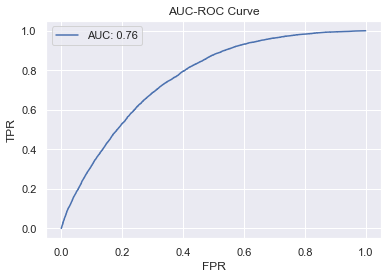

In [65]:
# evaluating via AUC-ROC Curve
predictions = forest.predict_proba(test_x)[::,1]
fpr, tpr, _ = roc_curve(test_y, predictions, pos_label = "Yes")
auc = roc_auc_score(test_y, predictions)
plt.plot(fpr, tpr, label=f'AUC: {round(auc, 2)}')
plt.title("AUC-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# recording AUC
results.loc["Random Forest Classifier", "AUC"] = auc

## **Conclusions**

In [66]:
# showing the results
results

,Accuracy,FPR,FNR,AUC
Logistic Regression,0.699553,0.3117,0.225872,0.802888
Random Forest Classifier,0.674173,0.333896,0.272356,0.761871


Based on the results from the <code>LogisticRegression</code> and <code>RandomForestClassifier</code> models, <code>LogisticRegression</code> is the more accurate model as it outperforms the <code>RandomForestClassifier</code> in terms of accuracy and has a higher AUC score. It also has a lower false positive and false negative rate. 

**Feature Importance**

The <code>LogisticRegression</code> model placed approximately equal importance to <code>BMI</code>, <code>AgeCategory</code> and <code>GenHealth</code> as predictors for diabetes. This is in contrast to the <code>RandomForestClassifier</code>. It placed the high importance on <code>BMI</code>. However, <code>GenHealth</code> and <code>AgeCategory</code> are about half as important as <code>BMI</code>, and <code>SleepTime</code> is about a quarter as important as <code>BMI</code>.

Both models suggest that <code>BMI</code> is an important factor and <code>SleepTime</code> is a relatively unimportant feature in predicting <code>Diabetic</code>. 

However, <code>LogisticRegression</code> placed importance on the variables more evenly, with <code>SleepTime</code> being an aforementioned exception, whereas the <code>RandomForestClassifier</code> placed greater relative feature importance on <code>BMI</code> as compared to the rest of the variables.

<strong>So to answer our initial question, BMI, age and general health are definitely risk factors of diabetes.</strong>

## References:

Bali A. (2022, April 5). <em>Chi-Square Formula: Definition, P-value, Applications, Examples</em>. collegedunia. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://collegedunia.com/exams/chi-square-formula-definition-pvalue-applications-examples-articleid-4167#fi  

Chao, D. Y. (2021, May 22). <em>Chi-Square Test, with Python</em>. Towards Data Science. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626  

<em>Common pitfalls and recommended practices</em>. (n.d.). Scikit-learn. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://scikit-learn.org/stable/common_pitfalls.html  

<em>Imbalanced Data</em>. (2011, Nov 1). Google Developers. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data  

Pytlak, K. (2022). <em>Personal Key Indicators of Heart Disease</em>. Kaggle. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

<em>RandomUnderSampler</em>. (n.d.). ImbalancedLearn. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

Richmond, S. (2016, March 21). <em>Algorithms Exposed: Random Forest</em>. bccvl. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://bccvl.org.au/algorithms-exposed-random-forest/#:~:text=ASSUMPTIONS,are%20ordinal%20or%20non%2Dordinal  

Sarang, N. (2018, June 27). <em>Understanding AUC - ROC Curve</em>. Towards Data Science. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

Seb. (2021, April 8). <em>Chi-Square Distribution Table</em>. Programmathically. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://programmathically.com/chi-square-distribution-table/  

<em>Singapore's War on Diabetes</em>. (2021, May 26). HealthHub. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://www.healthhub.sg/live-healthy/1273/d-day-for-diabetes

<em>sklearn.ensemble.RandomForestClassifier</em>. (n.d.). Scikit-learn. <br>&nbsp;&nbsp;&nbsp;&nbsp; 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

<em>sklearn.feature_selection.RFE</em>. (n.d.). Scikit-learn. <br>&nbsp;&nbsp;&nbsp;&nbsp; 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html?highlight=rfe#sklearn.feature_selection.RFE

<em>sklearn.linear_model.LogisticRegression</em>. (n.d.). Scikit-learn. <br>&nbsp;&nbsp;&nbsp;&nbsp; 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

<em>sklearn.metrics.classification_report</em>. (n.d.). Scikit-learn. <br>&nbsp;&nbsp;&nbsp;&nbsp; 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

<em>sklearn.metrics.roc_auc_score</em>. (n.d.). Scikit-learn. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score

<em>sklearn.metrics.roc_curve</em>. (n.d.). Scikit-learn. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve  

<em>sklearn.preprocessing.PolynomialFeatures</em> (n.d.). Scikit-learn. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures

<em>sklearn.preprocessing.StandardScaler</em>. (n.d.). Scikit-learn. <br>&nbsp;&nbsp;&nbsp;&nbsp;
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler 

<em>Diabetes.</em> (2022). World Health Organization.<br>&nbsp;&nbsp;&nbsp;&nbsp;
https://www.who.int/health-topics/diabetes#tab=tab_1
